In [4]:
import spacy
import en_core_web_sm
nlp_spacy_core_web_lg = en_core_web_sm.load()


In [5]:
os.getcwd()

'C:\\Users\\Jack\\Documents_\\Thesis_2\\Features'

In [6]:
os.chdir("C:\\Users\\Jack\\Documents_\\Thesis_2\\Datasets")

In [7]:
nlp = spacy.load("en_core_web_sm")

In [8]:
df = pd.read_csv("DatasetFull.csv", encoding ="latin-1") #my full allsides data

In [9]:
df_mdt = pd.read_csv("final_labels_SG2.xlsx - Sheet1.csv") #manu, david, timo BABE data

In [10]:
df_merged = pd.read_csv("AllSides AdFontes Merged.csv", encoding = "latin-1") # AllSides data with AdFontes ratings included
df_merged_extreme = pd.read_csv("AllAd Merged Extreme.csv", encoding = "latin-1") # AllSides data with AdFontes rating included, prerated based on extreme labels (AdFont_Bias = 1 if AdFontes rating is <-15 or >15, 0 if AdFontes rating is between -8 and 8)
df_ad_art = pd.read_csv("AdFontes Article Classifications.csv", encoding = "latin-1") # AdFontes specific article ratings

In [11]:
df.head()

,Source,Headline,Text,Bias,Subject_Tag,Date
0,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021"
1,Wall Street Journal (News),Vaccines Appear to Be Slowing Spread of Covid-...,Vaccines appear to be starting to curb new Cov...,AllSides Media Bias Rating: Center,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021"
2,Washington Examiner,Pandemic retreat signals vaccines are working,COVID-19 cases and hospitalizations in the Uni...,AllSides Media Bias Rating: Lean Right,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021"
3,The Epoch Times,"NYT, Washington Post, NBC Retract Incorrect Re...","The New York Times, The Washington Post, and N...",AllSides Media Bias Rating: Lean Right,"Media Industry, Media Bias, New York Times, Wa...","May 2nd, 2021"
4,The Hill,"New York Times, WaPo, NBC retract reports abou...","The New York Times, The Washington Post and NB...",AllSides Media Bias Rating: Center,"Media Industry, Media Bias, New York Times, Wa...","May 2nd, 2021"


In [12]:
df_mdt.head()

,text,news_link,outlet,topic,type,label_bias,label_opinion,biased_words
0,"""Orange Is the New Black"" star Yael Stone is r...",https://www.foxnews.com/entertainment/australi...,Fox News,environment,right,Non-biased,Entirely factual,[]
1,"""We have one beautiful law,"" Trump recently sa...",https://www.alternet.org/2020/06/law-and-order...,Alternet,gun control,left,Biased,Somewhat factual but also opinionated,"['bizarre', 'characteristically']"
2,"...immigrants as criminals and eugenics, all o...",https://www.nbcnews.com/news/latino/after-step...,MSNBC,white-nationalism,left,Biased,Expresses writer’s opinion,"['criminals', 'fringe', 'extreme']"
3,...we sounded the alarm in the early months of...,https://www.alternet.org/2019/07/fox-news-has-...,Alternet,white-nationalism,left,Biased,Somewhat factual but also opinionated,[]
4,[Black Lives Matter] is essentially a non-fals...,http://feedproxy.google.com/~r/breitbart/~3/-v...,Breitbart,marriage-equality,NaN,Biased,Expresses writer’s opinion,['cult']


In [13]:
df_merged.head()

,Source,Headline,Text,Bias.x,Subject_Tag,Date,AdFont_Bias,AdFont_Reli
0,Washington Examiner,Pandemic retreat signals vaccines are working,COVID-19 cases and hospitalizations in the Uni...,AllSides Media Bias Rating: Lean Right,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021",15.24,32.01
1,The Hill,"New York Times, WaPo, NBC retract reports abou...","The New York Times, The Washington Post and NB...",AllSides Media Bias Rating: Center,"Media Industry, Media Bias, New York Times, Wa...","May 2nd, 2021",-0.26,45.10
2,The Guardian,Trumps border wall hits a wall as Pentagon ca...,The US Department of Defense said on Friday it...,AllSides Media Bias Rating: Lean Left,"Immigration, Border Wall, Pentagon, US Militar...","May 1st, 2021",-9.91,44.54
3,The Hill,Biden cancels military-funded border wall proj...,President Biden is canceling projects to build...,AllSides Media Bias Rating: Center,"Immigration, Border Wall, Pentagon, US Militar...","May 1st, 2021",-0.26,45.10
4,National Review,Bidens Con against America,"OPINION\r\nOne-hundred days in, Bidens radica...",AllSides Media Bias Rating: Right,"Bridging Divides, Joe Biden, Polarization, Whi...","April 30th, 2021",17.04,31.86


In [14]:
df_merged_extreme.head()

,Source,Headline,Text,Bias.x,Subject_Tag,Date,AdFont_Bias,AdFont_Reli
0,Washington Examiner,Pandemic retreat signals vaccines are working,COVID-19 cases and hospitalizations in the Uni...,AllSides Media Bias Rating: Lean Right,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021",1,32.01
1,The Hill,"New York Times, WaPo, NBC retract reports abou...","The New York Times, The Washington Post and NB...",AllSides Media Bias Rating: Center,"Media Industry, Media Bias, New York Times, Wa...","May 2nd, 2021",0,45.10
2,The Hill,Biden cancels military-funded border wall proj...,President Biden is canceling projects to build...,AllSides Media Bias Rating: Center,"Immigration, Border Wall, Pentagon, US Militar...","May 1st, 2021",0,45.10
3,National Review,Bidens Con against America,"OPINION\r\nOne-hundred days in, Bidens radica...",AllSides Media Bias Rating: Right,"Bridging Divides, Joe Biden, Polarization, Whi...","April 30th, 2021",1,31.86
4,The Hill,Mark Kelly: I didn't hear plan for border in B...,Democratic Sen. Mark Kelly (Ariz.) criticized ...,AllSides Media Bias Rating: Center,"Immigration, Border Crisis, Joe Biden","April 30th, 2021",0,45.10


In [15]:
df_ad_art.head()

,Headline,Bias,Reliability
0,Exclusive: Study finds pregnancy-related healt...,-6.33,45.67
1,Bidens first 100 days: How diverse is the adm...,-9.67,43.67
2,How COVID-19 has endangered gender equity worl...,-7.00,44.33
3,Inside the Lincoln Projects toxic workplace,-0.33,57.00
4,Pregnant health care workers could get Pfizer ...,-0.67,44.67


In [16]:
df["spacy_lg"] = df["Headline"].apply(lambda x: nlp_spacy_core_web_lg(x)) # applying spacy web tokenizer to headlines

In [17]:
df["spacy_lg_dict"] = None # to be filled in the next section

In [18]:
df.head()

,Source,Headline,Text,Bias,Subject_Tag,Date,spacy_lg,spacy_lg_dict
0,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)",None
1,Wall Street Journal (News),Vaccines Appear to Be Slowing Spread of Covid-...,Vaccines appear to be starting to curb new Cov...,AllSides Media Bias Rating: Center,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(Vaccines, Appear, to, Be, Slowing, Spread, of...",None
2,Washington Examiner,Pandemic retreat signals vaccines are working,COVID-19 cases and hospitalizations in the Uni...,AllSides Media Bias Rating: Lean Right,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(Pandemic, retreat, signals, vaccines, are, wo...",None
3,The Epoch Times,"NYT, Washington Post, NBC Retract Incorrect Re...","The New York Times, The Washington Post, and N...",AllSides Media Bias Rating: Lean Right,"Media Industry, Media Bias, New York Times, Wa...","May 2nd, 2021","(NYT, ,, Washington, Post, ,, NBC, Retract, In...",None
4,The Hill,"New York Times, WaPo, NBC retract reports abou...","The New York Times, The Washington Post and NB...",AllSides Media Bias Rating: Center,"Media Industry, Media Bias, New York Times, Wa...","May 2nd, 2021","(New, York, Times, ,, WaPo, ,, NBC, retract, r...",None


In [19]:
df["spacy_lg"][1][-2].lemma_

'Covid-19'

In [20]:
df["spacy_lg"][1][1].pos_

'VERB'

In [21]:
df["spacy_lg"][1][0].lemma_.lower()

'vaccines'

In [22]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [23]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from lightgbm import LGBMClassifier

import tensorflow as tf
import tensorflow_hub as hub

from transformers import BertTokenizer

In [5]:
import os
import pandas as pd

In [6]:
os.chdir("C:\\Users\\Jack\\Documents_\\Thesis_2\\Datasets")
assertives = list(pd.read_excel("Assertives.xlsx", header = None)[0]) # assertives data, courtesy of ___
factives = list(pd.read_excel("Factives.xlsx", header = None)[0])
hedges = list(pd.read_excel("Hedges.xlsx", header = None)[0])
implicatives = list(pd.read_excel("Implicatives.xlsx", header = None)[0])

negative = list(pd.read_excel("Negative Opinion Lexicon.xlsx", header = None)[0])
positive = list(pd.read_excel("Positive Opinion Lexicon.xlsx", header = None)[0])
bias_lex_recasens = list(pd.read_excel("Recasens Bias Lexicon 2012.xlsx", header = None)[0])
bias_lex_hube = list(pd.read_excel("HubeFetahu Bias Lexicon 2018.xlsx", header = None)[0])
report_verbs = list(pd.read_excel("Recasens Report Verbs.xlsx", header = None)[0])


In [26]:
df["Headline"]

0                 COVID Deaths Continue to Decline in U.S.
1        Vaccines Appear to Be Slowing Spread of Covid-...
2            Pandemic retreat signals vaccines are working
3        NYT, Washington Post, NBC Retract Incorrect Re...
4        New York Times, WaPo, NBC retract reports abou...
                               ...                        
16579    Murdoch: 'I have no idea' why Romney isn't cha...
16580    Illegal immigrants line up at consulates acros...
16581                       Obama to talk Medicare in Iowa
16582    Romney campaign tries to take Medicare away fr...
16583    Smoking Gun: Obama Admits He Cut Billions from...
Name: Headline, Length: 16584, dtype: object

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

vec = TfidfVectorizer(token_pattern = r"(?u)\b\w+\b")

vec.fit(df["Headline"])

tf_idf = pd.DataFrame(vec.transform(df["Headline"]).toarray(), columns = sorted(vec.vocabulary_.keys()))

In [28]:
liwc = pd.read_excel("LIWC 2015.xlsx")

In [29]:
liwc_codes = pd.read_excel("LIWC 2015.xlsx", sheet_name = "Sheet2", header = None)

In [30]:
list(liwc['(:'])

[30.0, 31.0, 120.0, 122.0, nan, nan, nan, nan, nan, nan]

In [31]:
import string

In [32]:
df['Cut'] = None
for index, row in df.iterrows():
    length = 0
    for token in df['spacy_lg'][index]:
        if token.pos_ not in ['PUNCT', 'SPACE', 'SYM', 'NUM']:
            length += 1
    if length < 5:
        df["Cut"][index] = 0
    else:
        df["Cut"][index] = 1

In [33]:
df = df[df["Cut"] == 1]

In [34]:
feats = ['text', 'text_low', 'pos', 'lemma', 'lemma_low', 'tag', 'dep', 'shape', 'is_alpha', 'is_stop', 'has_vec', 'glove_vec300', 
         'glove_vec300_norm', 'is_oov','morph', 'order', 'tf_idf', 'is_ne', 'ne_label'
         , 'negative', 'positive', 'bias_lex_r', 'bias_lex_h', 'liwc']

In [35]:
feats_C1 = [a + b for a, b in zip(feats, len(feats)*['_c1'])]
feats_C2 = [a + b for a, b in zip(feats, len(feats)*['_c2'])]
feats_C3 = [a + b for a, b in zip(feats, len(feats)*['_c3'])]
feats_C4 = [a + b for a, b in zip(feats, len(feats)*['_c4'])]

In [36]:


for index, row in df.iterrows():
    sent_tokens = []
    entities = [] # create list of named entities
    for ent in df["spacy_lg"][index].ents:
        ent_dict = {'text': ent.text,
                   'label': ent.label_}
        entities.append(ent_dict)
    
    order = 0
    for token in df['spacy_lg'][index]:
        if token.pos_ not in ['PUNCT', 'SPACE', 'SYM', 'CCONJ', 'PART', 'NUM']:
            order += 1    
            if token.text.lower() in list(tf_idf):
                tfidf_temp = tf_idf[token.text.lower()][index]
            else:
                tfidf_temp = None 
            token_dict = {'text':token.text,
                    'text_low': token.text.lower(),
                    'pos': token.pos_,
                    'lemma': token.lemma_,
                    'lemma_low': token.lemma_.lower(),
                    'tag': token.tag_,
                    'dep': token.dep_,
                    'shape': token.shape_,
                    'is_alpha': token.is_alpha,
                    'is_stop': token.is_stop,
                    'has_vec':token.has_vector,
                    'glove_vec300':token.vector,
                    'glove_vec300_norm':token.vector_norm,
                    'is_oov':token.is_oov,
                    'morph': token.morph,
                    'order': (order - 1),
                    'tf_idf': tfidf_temp}
            for ent in entities:
                if token.text in ent['text']:
                    token_dict['is_ne']=True
                    token_dict['ne_label']=ent['label']
            if 'is_ne' not in token_dict:
                token_dict['is_ne']=False
                token_dict['ne_label']=None
            
            # LIWC2015 FEATURES
            if token.text.lower() in list(liwc):
                token_dict['liwc'] = list(liwc[token.text.lower()])
            elif token.lemma_ in list(liwc):
                token_dict['liwc'] = list(liwc[token.lemma_])
            else:
                token_dict['liwc'] = []
            
            # negative opinion
            if token.text.lower() in negative:
                token_dict['negative'] = 1
            elif token.lemma_.lower() in negative:
                token_dict['negative'] = 1
            else:
                token_dict['negative'] = 0
                
            # positive opinion
            if token.text.lower() in positive:
                token_dict['positive'] = 1
            elif token.lemma_.lower() in positive:
                token_dict['positive'] = 1
            else:
                token_dict['positive'] = 0
            
           # bias lexicon hube
            if token.text.lower() in bias_lex_hube:
                token_dict['bias_lex_h'] = 1
            elif token.lemma_.lower() in bias_lex_hube:
                token_dict['bias_lex_h'] = 1
            else:
                token_dict['bias_lex_h'] = 0
                
            # bias lexicon recasens
            if token.text.lower() in bias_lex_recasens:
                token_dict['bias_lex_r'] = 1
            elif token.lemma_.lower() in bias_lex_recasens:
                token_dict['bias_lex_r'] = 1
            else:
                token_dict['bias_lex_r'] = 0
                
            sent_tokens.append(token_dict)
            
    for token in sent_tokens:
        # the 1st word in the sentence
        if token['order'] == 0:
            for feat in feats_C1: # context word -2
                token[feat]=None
            for feat in feats_C2: # context word -1
                token[feat]=None
            for i, feat in enumerate(feats_C3): # context word +1
                token[feat]=sent_tokens[token['order']+1][feats[i]]
            for i, feat in enumerate(feats_C4): # context word +2
                token[feat]=sent_tokens[token['order']+2][feats[i]]
        # the 2nd word in the sentence
        elif token['order'] == 1:
            for feat in feats_C1: # context word -2
                token[feat]=None
            for i, feat in enumerate(feats_C2): # context word -1
                token[feat]=sent_tokens[token['order']-1][feats[i]]
            for i, feat in enumerate(feats_C3): # context word +1
                token[feat]=sent_tokens[token['order']+1][feats[i]]
            for i, feat in enumerate(feats_C4): # context word +2
                token[feat]=sent_tokens[token['order']+2][feats[i]]
        # the pre-last word in the sentence
        elif token['order'] == (len(sent_tokens)-2):
            for i, feat in enumerate(feats_C1): # context word -2
                token[feat]=sent_tokens[token['order']-2][feats[i]]
            for i, feat in enumerate(feats_C2): # context word -1
                token[feat]=sent_tokens[token['order']-1][feats[i]]
            for i, feat in enumerate(feats_C3): # context word +1
                token[feat]=sent_tokens[token['order']+1][feats[i]]
            for i, feat in enumerate(feats_C4): # context word +2
                token[feat]=None
        # the last word in the sentence
        elif token['order'] == (len(sent_tokens)-1):
            for i, feat in enumerate(feats_C1): # context word -2
                token[feat]=sent_tokens[token['order']-2][feats[i]]
            for i, feat in enumerate(feats_C2): # context word -1
                token[feat]=sent_tokens[token['order']-1][feats[i]]
            for i, feat in enumerate(feats_C3): # context word +1
                token[feat]=None
            for i, feat in enumerate(feats_C4): # context word +2
                token[feat]=None
        # in other cases:
        else:
            for i, feat in enumerate(feats_C1): # context word -2
                token[feat]=sent_tokens[token['order']-2][feats[i]]
            for i, feat in enumerate(feats_C2): # context word -1
                token[feat]=sent_tokens[token['order']-1][feats[i]]
            for i, feat in enumerate(feats_C3): # context word +1
                token[feat]=sent_tokens[token['order']+1][feats[i]]
            for i, feat in enumerate(feats_C4): # context word +2
                token[feat]=sent_tokens[token['order']+2][feats[i]]            
        
    
    # update column spacy_lg_dict
    df.at[index,'spacy_lg_dict'] = sent_tokens

In [37]:
# add windows of -4 and +4 words and lemmas
for index, row in df.iterrows():
   
    if len(row.spacy_lg_dict) >= 8:
        for i, token in enumerate(row.spacy_lg_dict):
            
            if i == 0:
              
                token['window_text'] = [None, None, None, None, token['text_low'],
                                        row.spacy_lg_dict[i+1]['text_low'],row.spacy_lg_dict[i+2]['text_low'],
                                        row.spacy_lg_dict[i+3]['text_low'],row.spacy_lg_dict[i+4]['text_low']]
                token['window_lemma'] = [None, None, None, None, token['lemma_low'],
                                        row.spacy_lg_dict[i+1]['lemma_low'],row.spacy_lg_dict[i+2]['lemma_low'],
                                        row.spacy_lg_dict[i+3]['lemma_low'],row.spacy_lg_dict[i+4]['lemma_low']]
            elif i == 1:
                
                token['window_text'] = [None, None, None, row.spacy_lg_dict[i-1]['text_low'], token['text_low'],
                                        row.spacy_lg_dict[i+1]['text_low'],row.spacy_lg_dict[i+2]['text_low'],
                                        row.spacy_lg_dict[i+3]['text_low'],row.spacy_lg_dict[i+4]['text_low']]
                token['window_lemma'] = [None, None, None, row.spacy_lg_dict[i-1]['lemma_low'], token['lemma_low'],
                                        row.spacy_lg_dict[i+1]['lemma_low'],row.spacy_lg_dict[i+2]['lemma_low'],
                                        row.spacy_lg_dict[i+3]['lemma_low'],row.spacy_lg_dict[i+4]['lemma_low']]
            elif i == 2:
               
                token['window_text'] = [None, None, row.spacy_lg_dict[i-2]['text_low'],
                                        row.spacy_lg_dict[i-1]['text_low'],token['text_low'],
                                        row.spacy_lg_dict[i+1]['text_low'],row.spacy_lg_dict[i+2]['text_low'],
                                        row.spacy_lg_dict[i+3]['text_low'],row.spacy_lg_dict[i+4]['text_low']]
                token['window_lemma'] = [None, None, row.spacy_lg_dict[i-2]['lemma_low'],
                                         row.spacy_lg_dict[i-1]['lemma_low'],token['lemma_low'],
                                        row.spacy_lg_dict[i+1]['lemma_low'],row.spacy_lg_dict[i+2]['lemma_low'],
                                        row.spacy_lg_dict[i+3]['lemma_low'],row.spacy_lg_dict[i+4]['lemma_low']]
            elif i == 3:
              
                token['window_text'] = [None, row.spacy_lg_dict[i-3]['text_low'], row.spacy_lg_dict[i-2]['text_low'],
                                        row.spacy_lg_dict[i-1]['text_low'],token['text_low'],
                                        row.spacy_lg_dict[i+1]['text_low'],row.spacy_lg_dict[i+2]['text_low'],
                                        row.spacy_lg_dict[i+3]['text_low'],row.spacy_lg_dict[i+4]['text_low']]
                token['window_lemma'] = [None, row.spacy_lg_dict[i-3]['lemma_low'], row.spacy_lg_dict[i-2]['lemma_low'],
                                         row.spacy_lg_dict[i-1]['lemma_low'],token['lemma_low'],
                                        row.spacy_lg_dict[i+1]['lemma_low'],row.spacy_lg_dict[i+2]['lemma_low'],
                                        row.spacy_lg_dict[i+3]['lemma_low'],row.spacy_lg_dict[i+4]['lemma_low']]
            elif i == (len(row.spacy_lg_dict)-4):
               
                token['window_text'] = [row.spacy_lg_dict[i-4]['text_low'], row.spacy_lg_dict[i-3]['text_low'],
                                        row.spacy_lg_dict[i-2]['text_low'], row.spacy_lg_dict[i-1]['text_low'],
                                        token['text_low'],
                                        row.spacy_lg_dict[i+1]['text_low'],row.spacy_lg_dict[i+2]['text_low'],
                                        row.spacy_lg_dict[i+3]['text_low'],None]
                token['window_lemma'] = [row.spacy_lg_dict[i-4]['lemma_low'], row.spacy_lg_dict[i-3]['lemma_low'],
                                         row.spacy_lg_dict[i-2]['lemma_low'], row.spacy_lg_dict[i-1]['lemma_low'],
                                         token['lemma_low'],
                                        row.spacy_lg_dict[i+1]['lemma_low'],row.spacy_lg_dict[i+2]['lemma_low'],
                                        row.spacy_lg_dict[i+3]['lemma_low'],None]
            elif i == (len(row.spacy_lg_dict)-3):
                
                token['window_text'] = [row.spacy_lg_dict[i-4]['text_low'], row.spacy_lg_dict[i-3]['text_low'],
                                        row.spacy_lg_dict[i-2]['text_low'], row.spacy_lg_dict[i-1]['text_low'],
                                        token['text_low'],
                                        row.spacy_lg_dict[i+1]['text_low'],row.spacy_lg_dict[i+2]['text_low'],
                                        None,None]
                token['window_lemma'] = [row.spacy_lg_dict[i-4]['lemma_low'], row.spacy_lg_dict[i-3]['lemma_low'],
                                         row.spacy_lg_dict[i-2]['lemma_low'], row.spacy_lg_dict[i-1]['lemma_low'],
                                         token['lemma_low'],
                                        row.spacy_lg_dict[i+1]['lemma_low'],row.spacy_lg_dict[i+2]['lemma_low'],
                                         None,None]
            elif i == (len(row.spacy_lg_dict)-2):
                
                token['window_text'] = [row.spacy_lg_dict[i-4]['text_low'], row.spacy_lg_dict[i-3]['text_low'],
                                        row.spacy_lg_dict[i-2]['text_low'], row.spacy_lg_dict[i-1]['text_low'],
                                        token['text_low'],row.spacy_lg_dict[i+1]['text_low'],None,None,None]
                token['window_lemma'] = [row.spacy_lg_dict[i-4]['lemma_low'], row.spacy_lg_dict[i-3]['lemma_low'],
                                         row.spacy_lg_dict[i-2]['lemma_low'], row.spacy_lg_dict[i-1]['lemma_low'],
                                         token['lemma_low'],row.spacy_lg_dict[i+1]['lemma_low'],None,None,None]
            elif i == (len(row.spacy_lg_dict)-1):
                
                token['window_text'] = [row.spacy_lg_dict[i-4]['text_low'], row.spacy_lg_dict[i-3]['text_low'],
                                        row.spacy_lg_dict[i-2]['text_low'], row.spacy_lg_dict[i-1]['text_low'],
                                        token['text_low'],None,None,None,None]
                token['window_lemma'] = [row.spacy_lg_dict[i-4]['lemma_low'], row.spacy_lg_dict[i-3]['lemma_low'],
                                         row.spacy_lg_dict[i-2]['lemma_low'], row.spacy_lg_dict[i-1]['lemma_low'],
                                         token['lemma_low'],None,None,None,None]
            else:
                
                token['window_text'] = [row.spacy_lg_dict[i-4]['text_low'], row.spacy_lg_dict[i-3]['text_low'],
                                        row.spacy_lg_dict[i-2]['text_low'], row.spacy_lg_dict[i-1]['text_low'],
                                        token['text_low'],
                                        row.spacy_lg_dict[i+1]['text_low'],row.spacy_lg_dict[i+2]['text_low'],
                                        row.spacy_lg_dict[i+3]['text_low'],row.spacy_lg_dict[i+4]['text_low']]
                token['window_lemma'] = [row.spacy_lg_dict[i-4]['lemma_low'], row.spacy_lg_dict[i-3]['lemma_low'],
                                         row.spacy_lg_dict[i-2]['lemma_low'], row.spacy_lg_dict[i-1]['lemma_low'],
                                         token['lemma_low'],
                                        row.spacy_lg_dict[i+1]['lemma_low'],row.spacy_lg_dict[i+2]['lemma_low'],
                                        row.spacy_lg_dict[i+3]['lemma_low'],row.spacy_lg_dict[i+4]['lemma_low']]

        
    else:
        for i, token in enumerate(row.spacy_lg_dict):
            token['window_text'] = None
            token['window_lemma'] = None

In [38]:
# token itself
for index, row in df.iterrows():
    for i, token in enumerate(row.spacy_lg_dict):
        if token['window_text'] != None and token['window_lemma'] != None:
            window_text = token['window_text']
            window_lemma = token['window_lemma']

            # words
            c1, c2, c_m, c3, c4 = None, None, None, None, None
            if window_text[2] != None and window_text[3] != None:
                c1 = window_text[2] + ' ' + window_text[3] + ' ' + token['text_low']
            if window_text[3] != None:
                c2 = window_text[3] + ' ' + token['text_low']
            if window_text[3] != None and window_text[5] != None:
                c_m = window_text[3] + ' ' + token['text_low'] + ' ' + window_text[5]
            if window_text[5] != None:
                c3 = token['text_low'] + ' ' + window_text[5]
            if window_text[5] != None and window_text[6] != None:
                c4 = token['text_low'] + ' ' + window_text[5] + ' ' + window_text[6]

            # lemmas
            c1l, c2l, c_ml, c3l, c4l = None, None, None, None, None
            if window_lemma[2] != None and window_lemma[3] != None:
                c1l = window_lemma[2] + ' ' + window_lemma[3] + ' ' + token['lemma_low']
            if window_lemma[3] != None:
                c2l = window_lemma[3] + ' ' + token['lemma_low']
            if window_lemma[3] != None and window_lemma[5] != None:
                c_ml = window_lemma[3] + ' ' + token['lemma_low'] + ' ' + window_lemma[5]
            if window_lemma[5] != None:
                c3l = token['lemma_low'] + ' ' + window_lemma[5]
            if window_lemma[5] != None and window_text[6] != None:
                c4l = token['lemma_low'] + ' ' + window_lemma[5] + ' ' + window_lemma[6]

            # assertive verbs
            if token['text_low'] in assertives or c1 in assertives or c2 in assertives or \
            c_m in assertives or c3 in assertives or c4 in assertives or \
            token['lemma_low'] in assertives or c1l in assertives or c2l in assertives or \
            c_ml in assertives or c3l in assertives or c4l in assertives:
                token['assertives'] = 1
            else:
                token['assertives'] = 0   

            # factive verbs
            if token['text_low'] in factives or c1 in factives or c2 in factives or \
            c_m in factives or c3 in factives or c4 in factives or \
            token['lemma_low'] in factives or c1l in factives or c2l in factives or \
            c_ml in factives or c3l in factives or c4l in factives:
                token['factives'] = 1
            else:
                token['factives'] = 0   

            # report verbs
            if token['text_low'] in report_verbs or c1 in report_verbs or c2 in report_verbs or \
            c_m in report_verbs or c3 in report_verbs or c4 in report_verbs or \
            token['lemma_low'] in report_verbs or c1l in report_verbs or c2l in report_verbs or \
            c_ml in report_verbs or c3l in report_verbs or c4l in report_verbs:
                token['report_verbs'] = 1
            else:
                token['report_verbs'] = 0

            # hedges
            if token['text_low'] in hedges or c1 in hedges or c2 in hedges or \
            c_m in hedges or c3 in hedges or c4 in hedges or \
            token['lemma_low'] in hedges or c1l in hedges or c2l in hedges or \
            c_ml in hedges or c3l in hedges or c4l in hedges:
                token['hedges'] = 1
            else:
                token['hedges'] = 0

            # boosters
            #if token['text_low'] in boosters or c1 in boosters or c2 in boosters or \
            #c_m in boosters or c3 in boosters or c4 in boosters or \
            #token['lemma_low'] in boosters or c1l in boosters or c2l in boosters or \
            #c_ml in boosters or c3l in boosters or c4l in boosters:
            #    token['boosters'] = 1
            #else:
            #    token['boosters'] = 0
                
            # implicative verbs
            if token['text_low'] in implicatives or c1 in implicatives or c2 in implicatives or \
            c_m in implicatives or c3 in implicatives or c4 in implicatives or \
            token['lemma_low'] in implicatives or c1l in implicatives or c2l in implicatives or \
            c_ml in implicatives or c3l in implicatives or c4l in implicatives:
                token['implicatives'] = 1
            else:
                token['implicatives'] = 0
            
        
        else:
            # assertive verbs
            if token['text_low'] in assertives or token['lemma_low'] in assertives:
                token['assertives'] = 1
            else:
                token['assertives'] = 0 

            # factive verbs
            if token['text_low'] in factives or token['lemma_low'] in factives:
                token['factives'] = 1
            else:
                token['factives'] = 0   

            # report verbs
            if token['text_low'] in report_verbs or token['lemma_low'] in report_verbs:
                token['report_verbs'] = 1
            else:
                token['report_verbs'] = 0

            # hedges
            if token['text_low'] in hedges or token['lemma_low'] in hedges:
                token['hedges'] = 1
            else:
                token['hedges'] = 0

            # boosters
            #if token['text_low'] in boosters or token['lemma_low'] in boosters:
            #    token['boosters'] = 1
            #else:
            #    token['boosters'] = 0
                
            # implicative verbs
            if token['text_low'] in implicatives or token['lemma_low'] in implicatives:
                token['implicatives'] = 1
            else:
                token['implicatives'] = 0
            

In [39]:
# c1
for index, row in df.iterrows():
    for i, token in enumerate(row.spacy_lg_dict):
        if token['text_low_c1'] == None:
            token['assertives_c1'] = 0
            token['factives_c1'] = 0
            token['report_verbs_c1'] = 0
            token['hedges_c1'] = 0
            #token['boosters_C1'] = 0
            token['implicatives_c1'] = 0
        else:
            
            if token['window_text'] != None and token['window_lemma'] != None:
                window_text = token['window_text']
                window_lemma = token['window_lemma']

                # words
                c1, c2, c_m, c3, c4 = None, None, None, None, None
                if window_text[0] != None and window_text[1] != None:
                    c1 = window_text[0] + ' ' + window_text[1] + ' ' + token['text_low_c1']
                if window_text[1] != None:
                    c2 = window_text[1] + ' ' + token['text_low_c1']
                if window_text[1] != None and window_text[3] != None:
                    c_m = window_text[1] + ' ' + token['text_low_c1'] + ' ' + window_text[3]
                if window_text[3] != None:
                    c3 = token['text_low_c1'] + ' ' + window_text[3]
                if window_text[3] != None and window_text[4] != None:
                    c4 = token['text_low_c1'] + ' ' + window_text[3] + ' ' + window_text[4]

                # lemmas
                c1l, c2l, c_ml, c3l, c4l = None, None, None, None, None
                if window_lemma[0] != None and window_lemma[1] != None:
                    c1l = window_lemma[0] + ' ' + window_lemma[1] + ' ' + token['lemma_low_c1']
                if window_lemma[1] != None:
                    c2l = window_lemma[1] + ' ' + token['lemma_low_c1']
                if window_lemma[1] != None and window_lemma[3] != None:
                    c_ml = window_lemma[1] + ' ' + token['lemma_low_c1'] + ' ' + window_lemma[3]
                if window_lemma[3] != None:
                    c3l = token['lemma_low_c1'] + ' ' + window_lemma[3]
                if window_lemma[3] != None and window_text[4] != None:
                    c4l = token['lemma_low_c1'] + ' ' + window_lemma[3] + ' ' + window_lemma[4]

                # assertive verbs
                if token['text_low_c1'] in assertives or c1 in assertives or c2 in assertives or \
                c_m in assertives or c3 in assertives or c4 in assertives or \
                token['lemma_low_c1'] in assertives or c1l in assertives or c2l in assertives or \
                c_ml in assertives or c3l in assertives or c4l in assertives:
                    token['assertives_c1'] = 1
                else:
                    token['assertives_c1'] = 0   

                # factive verbs
                if token['text_low_c1'] in factives or c1 in factives or c2 in factives or \
                c_m in factives or c3 in factives or c4 in factives or \
                token['lemma_low_c1'] in factives or c1l in factives or c2l in factives or \
                c_ml in factives or c3l in factives or c4l in factives:
                    token['factives_c1'] = 1
                else:
                    token['factives_c1'] = 0   

                # report verbs
                if token['text_low_c1'] in report_verbs or c1 in report_verbs or c2 in report_verbs or \
                c_m in report_verbs or c3 in report_verbs or c4 in report_verbs or \
                token['lemma_low_c1'] in report_verbs or c1l in report_verbs or c2l in report_verbs or \
                c_ml in report_verbs or c3l in report_verbs or c4l in report_verbs:
                    token['report_verbs_c1'] = 1
                else:
                    token['report_verbs_c1'] = 0

                # hedges
                if token['text_low_c1'] in hedges or c1 in hedges or c2 in hedges or \
                c_m in hedges or c3 in hedges or c4 in hedges or \
                token['lemma_low_c1'] in hedges or c1l in hedges or c2l in hedges or \
                c_ml in hedges or c3l in hedges or c4l in hedges:
                    token['hedges_c1'] = 1
                else:
                    token['hedges_c1'] = 0

                # boosters
                #if token['text_low'] in boosters or c1 in boosters or c2 in boosters or \
                #c_m in boosters or c3 in boosters or c4 in boosters or \
                #token['lemma_low'] in boosters or c1l in boosters or c2l in boosters or \
                #c_ml in boosters or c3l in boosters or c4l in boosters:
                #    token['boosters'] = 1
                #else:
                #    token['boosters'] = 0

                # implicative verbs
                if token['text_low_c1'] in implicatives or c1 in implicatives or c2 in implicatives or \
                c_m in implicatives or c3 in implicatives or c4 in implicatives or \
                token['lemma_low_c1'] in implicatives or c1l in implicatives or c2l in implicatives or \
                c_ml in implicatives or c3l in implicatives or c4l in implicatives:
                    token['implicatives_c1'] = 1
                else:
                    token['implicatives_c1'] = 0


            else:
                # assertive verbs
                if token['text_low_c1'] in assertives or token['lemma_low_c1'] in assertives:
                    token['assertives_c1'] = 1
                else:
                    token['assertives_c1'] = 0 

                # factive verbs
                if token['text_low_c1'] in factives or token['lemma_low_c1'] in factives:
                    token['factives_c1'] = 1
                else:
                    token['factives_c1'] = 0   

                # report verbs
                if token['text_low'] in report_verbs or token['lemma_low'] in report_verbs:
                    token['report_verbs_c1'] = 1
                else:
                    token['report_verbs_c1'] = 0

                # hedges
                if token['text_low_c1'] in hedges or token['lemma_low_c1'] in hedges:
                    token['hedges_c1'] = 1
                else:
                    token['hedges_c1'] = 0

                # boosters
                #if token['text_low'] in boosters or token['lemma_low'] in boosters:
                #    token['boosters'] = 1
                #else:
                #    token['boosters'] = 0

                # implicative verbs
                if token['text_low_c1'] in implicatives or token['lemma_low_c1'] in implicatives:
                    token['implicatives_c1'] = 1
                else:
                    token['implicatives_c1'] = 0


In [40]:
# c2
for index, row in df.iterrows():
    for i, token in enumerate(row.spacy_lg_dict):
        if token['text_low_c2'] == None:
            token['assertives_c2'] = 0
            token['factives_c2'] = 0
            token['report_verbs_c2'] = 0
            token['hedges_c2'] = 0
            #token['boosters_c2'] = 0
            token['implicatives_c2'] = 0
        else:
            
            if token['window_text'] != None and token['window_lemma'] != None:
                window_text = token['window_text']
                window_lemma = token['window_lemma']

                # words
                c1, c2, c_m, c3, c4 = None, None, None, None, None
                if window_text[1] != None and window_text[2] != None:
                    c1 = window_text[1] + ' ' + window_text[2] + ' ' + token['text_low_c2']
                if window_text[2] != None:
                    c2 = window_text[2] + ' ' + token['text_low_c2']
                if window_text[2] != None and window_text[4] != None:
                    c_m = window_text[2] + ' ' + token['text_low_c2'] + ' ' + window_text[4]
                if window_text[4] != None:
                    c3 = token['text_low_c2'] + ' ' + window_text[4]
                if window_text[4] != None and window_text[5] != None:
                    c4 = token['text_low_c2'] + ' ' + window_text[4] + ' ' + window_text[5]

                # lemmas
                c1l, c2l, c_ml, c3l, c4l = None, None, None, None, None
                if window_lemma[1] != None and window_lemma[2] != None:
                    c1l = window_lemma[1] + ' ' + window_lemma[2] + ' ' + token['lemma_low_c2']
                if window_lemma[2] != None:
                    c2l = window_lemma[2] + ' ' + token['lemma_low_c2']
                if window_lemma[2] != None and window_lemma[4] != None:
                    c_ml = window_lemma[2] + ' ' + token['lemma_low_c2'] + ' ' + window_lemma[4]
                if window_lemma[4] != None:
                    c3l = token['lemma_low_c2'] + ' ' + window_lemma[4]
                if window_lemma[4] != None and window_text[5] != None:
                    c4l = token['lemma_low_c2'] + ' ' + window_lemma[4] + ' ' + window_lemma[5]

                # assertive verbs
                if token['text_low_c2'] in assertives or c1 in assertives or c2 in assertives or \
                c_m in assertives or c3 in assertives or c4 in assertives or \
                token['lemma_low_c2'] in assertives or c1l in assertives or c2l in assertives or \
                c_ml in assertives or c3l in assertives or c4l in assertives:
                    token['assertives_c2'] = 1
                else:
                    token['assertives_c2'] = 0   

                # factive verbs
                if token['text_low_c2'] in factives or c1 in factives or c2 in factives or \
                c_m in factives or c3 in factives or c4 in factives or \
                token['lemma_low_c2'] in factives or c1l in factives or c2l in factives or \
                c_ml in factives or c3l in factives or c4l in factives:
                    token['factives_c2'] = 1
                else:
                    token['factives_c2'] = 0   

                # report verbs
                if token['text_low_c2'] in report_verbs or c1 in report_verbs or c2 in report_verbs or \
                c_m in report_verbs or c3 in report_verbs or c4 in report_verbs or \
                token['lemma_low_c2'] in report_verbs or c1l in report_verbs or c2l in report_verbs or \
                c_ml in report_verbs or c3l in report_verbs or c4l in report_verbs:
                    token['report_verbs_c2'] = 1
                else:
                    token['report_verbs_c2'] = 0

                # hedges
                if token['text_low_c2'] in hedges or c1 in hedges or c2 in hedges or \
                c_m in hedges or c3 in hedges or c4 in hedges or \
                token['lemma_low_c2'] in hedges or c1l in hedges or c2l in hedges or \
                c_ml in hedges or c3l in hedges or c4l in hedges:
                    token['hedges_c2'] = 1
                else:
                    token['hedges_c2'] = 0

                # boosters
                #if token['text_low'] in boosters or c1 in boosters or c2 in boosters or \
                #c_m in boosters or c3 in boosters or c4 in boosters or \
                #token['lemma_low'] in boosters or c1l in boosters or c2l in boosters or \
                #c_ml in boosters or c3l in boosters or c4l in boosters:
                #    token['boosters'] = 1
                #else:
                #    token['boosters'] = 0

                # implicative verbs
                if token['text_low_c2'] in implicatives or c1 in implicatives or c2 in implicatives or \
                c_m in implicatives or c3 in implicatives or c4 in implicatives or \
                token['lemma_low_c2'] in implicatives or c1l in implicatives or c2l in implicatives or \
                c_ml in implicatives or c3l in implicatives or c4l in implicatives:
                    token['implicatives_c2'] = 1
                else:
                    token['implicatives_c2'] = 0


            else:
                # assertive verbs
                if token['text_low_c2'] in assertives or token['lemma_low_c2'] in assertives:
                    token['assertives_c2'] = 1
                else:
                    token['assertives_c2'] = 0 

                # factive verbs
                if token['text_low_c2'] in factives or token['lemma_low_c2'] in factives:
                    token['factives_c2'] = 1
                else:
                    token['factives_c2'] = 0   

                # report verbs
                if token['text_low_c2'] in report_verbs or token['lemma_low_c2'] in report_verbs:
                    token['report_verbs_c2'] = 1
                else:
                    token['report_verbs_c2'] = 0

                # hedges
                if token['text_low_c2'] in hedges or token['lemma_low_c2'] in hedges:
                    token['hedges_c2'] = 1
                else:
                    token['hedges_c2'] = 0

                # boosters
                #if token['text_low'] in boosters or token['lemma_low'] in boosters:
                #    token['boosters'] = 1
                #else:
                #    token['boosters'] = 0

                # implicative verbs
                if token['text_low_c2'] in implicatives or token['lemma_low_c2'] in implicatives:
                    token['implicatives_c2'] = 1
                else:
                    token['implicatives_c2'] = 0


In [41]:
# c3
for index, row in df.iterrows():
    for i, token in enumerate(row.spacy_lg_dict):
        if token['text_low_c3'] == None:
            token['assertives_c3'] = 0
            token['factives_c3'] = 0
            token['report_verbs_c3'] = 0
            token['hedges_c3'] = 0
            #token['boosters_c2'] = 0
            token['implicatives_c3'] = 0
        else:
            
            if token['window_text'] != None and token['window_lemma'] != None:
                window_text = token['window_text']
                window_lemma = token['window_lemma']

                # words
                c1, c2, c_m, c3, c4 = None, None, None, None, None
                if window_text[3] != None and window_text[4] != None:
                    c1 = window_text[3] + ' ' + window_text[4] + ' ' + token['text_low_c3']
                if window_text[4] != None:
                    c2 = window_text[4] + ' ' + token['text_low_c3']
                if window_text[4] != None and window_text[6] != None:
                    c_m = window_text[4] + ' ' + token['text_low_c3'] + ' ' + window_text[6]
                if window_text[6] != None:
                    c3 = token['text_low_c3'] + ' ' + window_text[6]
                if window_text[6] != None and window_text[7] != None:
                    c4 = token['text_low_c3'] + ' ' + window_text[6] + ' ' + window_text[7]

                # lemmas
                c1l, c2l, c_ml, c3l, c4l = None, None, None, None, None
                if window_lemma[3] != None and window_lemma[4] != None:
                    c1l = window_lemma[3] + ' ' + window_lemma[4] + ' ' + token['lemma_low_c3']
                if window_lemma[4] != None:
                    c2l = window_lemma[4] + ' ' + token['lemma_low_c3']
                if window_lemma[4] != None and window_lemma[6] != None:
                    c_ml = window_lemma[4] + ' ' + token['lemma_low_c3'] + ' ' + window_lemma[6]
                if window_lemma[6] != None:
                    c3l = token['lemma_low_c3'] + ' ' + window_lemma[6]
                if window_lemma[6] != None and window_text[7] != None:
                    c4l = token['lemma_low_c3'] + ' ' + window_lemma[6] + ' ' + window_lemma[7]

                # assertive verbs
                if token['text_low_c3'] in assertives or c1 in assertives or c2 in assertives or \
                c_m in assertives or c3 in assertives or c4 in assertives or \
                token['lemma_low_c3'] in assertives or c1l in assertives or c2l in assertives or \
                c_ml in assertives or c3l in assertives or c4l in assertives:
                    token['assertives_c3'] = 1
                else:
                    token['assertives_c3'] = 0   

                # factive verbs
                if token['text_low_c3'] in factives or c1 in factives or c2 in factives or \
                c_m in factives or c3 in factives or c4 in factives or \
                token['lemma_low_c3'] in factives or c1l in factives or c2l in factives or \
                c_ml in factives or c3l in factives or c4l in factives:
                    token['factives_c3'] = 1
                else:
                    token['factives_c3'] = 0   

                # report verbs
                if token['text_low_c3'] in report_verbs or c1 in report_verbs or c2 in report_verbs or \
                c_m in report_verbs or c3 in report_verbs or c4 in report_verbs or \
                token['lemma_low_c3'] in report_verbs or c1l in report_verbs or c2l in report_verbs or \
                c_ml in report_verbs or c3l in report_verbs or c4l in report_verbs:
                    token['report_verbs_c3'] = 1
                else:
                    token['report_verbs_c3'] = 0

                # hedges
                if token['text_low_c3'] in hedges or c1 in hedges or c2 in hedges or \
                c_m in hedges or c3 in hedges or c4 in hedges or \
                token['lemma_low_c3'] in hedges or c1l in hedges or c2l in hedges or \
                c_ml in hedges or c3l in hedges or c4l in hedges:
                    token['hedges_c3'] = 1
                else:
                    token['hedges_c3'] = 0

                # boosters
                #if token['text_low'] in boosters or c1 in boosters or c2 in boosters or \
                #c_m in boosters or c3 in boosters or c4 in boosters or \
                #token['lemma_low'] in boosters or c1l in boosters or c2l in boosters or \
                #c_ml in boosters or c3l in boosters or c4l in boosters:
                #    token['boosters'] = 1
                #else:
                #    token['boosters'] = 0

                # implicative verbs
                if token['text_low_c3'] in implicatives or c1 in implicatives or c2 in implicatives or \
                c_m in implicatives or c3 in implicatives or c4 in implicatives or \
                token['lemma_low_c3'] in implicatives or c1l in implicatives or c2l in implicatives or \
                c_ml in implicatives or c3l in implicatives or c4l in implicatives:
                    token['implicatives_c3'] = 1
                else:
                    token['implicatives_c3'] = 0


            else:
                # assertive verbs
                if token['text_low_c3'] in assertives or token['lemma_low_c3'] in assertives:
                    token['assertives_c3'] = 1
                else:
                    token['assertives_c3'] = 0 

                # factive verbs
                if token['text_low_c3'] in factives or token['lemma_low_c3'] in factives:
                    token['factives_c3'] = 1
                else:
                    token['factives_c3'] = 0   

                # report verbs
                if token['text_low_c3'] in report_verbs or token['lemma_low_c3'] in report_verbs:
                    token['report_verbs_c3'] = 1
                else:
                    token['report_verbs_c3'] = 0

                # hedges
                if token['text_low_c3'] in hedges or token['lemma_low_c3'] in hedges:
                    token['hedges_c3'] = 1
                else:
                    token['hedges_c3'] = 0

                # boosters
                #if token['text_low'] in boosters or token['lemma_low'] in boosters:
                #    token['boosters'] = 1
                #else:
                #    token['boosters'] = 0

                # implicative verbs
                if token['text_low_c3'] in implicatives or token['lemma_low_c3'] in implicatives:
                    token['implicatives_c3'] = 1
                else:
                    token['implicatives_c3'] = 0


In [42]:
# c4
for index, row in df.iterrows():
    for i, token in enumerate(row.spacy_lg_dict):
        if token['text_low_c4'] == None:
            token['assertives_c4'] = 0
            token['factives_c4'] = 0
            token['report_verbs_c4'] = 0
            token['hedges_c4'] = 0
            #token['boosters_c2'] = 0
            token['implicatives_c4'] = 0
        else:
            
            if token['window_text'] != None and token['window_lemma'] != None:
                window_text = token['window_text']
                window_lemma = token['window_lemma']

                # words
                c1, c2, c_m, c3, c4 = None, None, None, None, None
                if window_text[4] != None and window_text[5] != None:
                    c1 = window_text[4] + ' ' + window_text[5] + ' ' + token['text_low_c4']
                if window_text[5] != None:
                    c2 = window_text[5] + ' ' + token['text_low_c4']
                if window_text[5] != None and window_text[7] != None:
                    c_m = window_text[5] + ' ' + token['text_low_c4'] + ' ' + window_text[7]
                if window_text[7] != None:
                    c3 = token['text_low_c4'] + ' ' + window_text[7]
                if window_text[7] != None and window_text[8] != None:
                    c4 = token['text_low_c4'] + ' ' + window_text[7] + ' ' + window_text[8]

                # lemmas
                c1l, c2l, c_ml, c3l, c4l = None, None, None, None, None
                if window_lemma[4] != None and window_lemma[5] != None:
                    c1l = window_lemma[4] + ' ' + window_lemma[5] + ' ' + token['lemma_low_c4']
                if window_lemma[5] != None:
                    c2l = window_lemma[5] + ' ' + token['lemma_low_c4']
                if window_lemma[5] != None and window_lemma[7] != None:
                    c_ml = window_lemma[5] + ' ' + token['lemma_low_c4'] + ' ' + window_lemma[7]
                if window_lemma[7] != None:
                    c3l = token['lemma_low_c4'] + ' ' + window_lemma[7]
                if window_lemma[7] != None and window_text[8] != None:
                    c4l = token['lemma_low_c4'] + ' ' + window_lemma[7] + ' ' + window_lemma[8]

                # assertive verbs
                if token['text_low_c4'] in assertives or c1 in assertives or c2 in assertives or \
                c_m in assertives or c3 in assertives or c4 in assertives or \
                token['lemma_low_c4'] in assertives or c1l in assertives or c2l in assertives or \
                c_ml in assertives or c3l in assertives or c4l in assertives:
                    token['assertives_c4'] = 1
                else:
                    token['assertives_c4'] = 0   

                # factive verbs
                if token['text_low_c4'] in factives or c1 in factives or c2 in factives or \
                c_m in factives or c3 in factives or c4 in factives or \
                token['lemma_low_c4'] in factives or c1l in factives or c2l in factives or \
                c_ml in factives or c3l in factives or c4l in factives:
                    token['factives_c4'] = 1
                else:
                    token['factives_c4'] = 0   

                # report verbs
                if token['text_low_c4'] in report_verbs or c1 in report_verbs or c2 in report_verbs or \
                c_m in report_verbs or c3 in report_verbs or c4 in report_verbs or \
                token['lemma_low_c4'] in report_verbs or c1l in report_verbs or c2l in report_verbs or \
                c_ml in report_verbs or c3l in report_verbs or c4l in report_verbs:
                    token['report_verbs_c4'] = 1
                else:
                    token['report_verbs_c4'] = 0

                # hedges
                if token['text_low_c4'] in hedges or c1 in hedges or c2 in hedges or \
                c_m in hedges or c3 in hedges or c4 in hedges or \
                token['lemma_low_c4'] in hedges or c1l in hedges or c2l in hedges or \
                c_ml in hedges or c3l in hedges or c4l in hedges:
                    token['hedges_c4'] = 1
                else:
                    token['hedges_c4'] = 0

                # boosters
                #if token['text_low'] in boosters or c1 in boosters or c2 in boosters or \
                #c_m in boosters or c3 in boosters or c4 in boosters or \
                #token['lemma_low'] in boosters or c1l in boosters or c2l in boosters or \
                #c_ml in boosters or c3l in boosters or c4l in boosters:
                #    token['boosters'] = 1
                #else:
                #    token['boosters'] = 0

                # implicative verbs
                if token['text_low_c4'] in implicatives or c1 in implicatives or c2 in implicatives or \
                c_m in implicatives or c3 in implicatives or c4 in implicatives or \
                token['lemma_low_c4'] in implicatives or c1l in implicatives or c2l in implicatives or \
                c_ml in implicatives or c3l in implicatives or c4l in implicatives:
                    token['implicatives_c4'] = 1
                else:
                    token['implicatives_c4'] = 0


            else:
                # assertive verbs
                if token['text_low_c4'] in assertives or token['lemma_low_c4'] in assertives:
                    token['assertives_c4'] = 1
                else:
                    token['assertives_c4'] = 0 

                # factive verbs
                if token['text_low_c4'] in factives or token['lemma_low_c4'] in factives:
                    token['factives_c4'] = 1
                else:
                    token['factives_c4'] = 0   

                # report verbs
                if token['text_low_c4'] in report_verbs or token['lemma_low_c4'] in report_verbs:
                    token['report_verbs_c4'] = 1
                else:
                    token['report_verbs_c4'] = 0

                # hedges
                if token['text_low_c4'] in hedges or token['lemma_low_c4'] in hedges:
                    token['hedges_c4'] = 1
                else:
                    token['hedges_c4'] = 0

                # boosters
                #if token['text_low'] in boosters or token['lemma_low'] in boosters:
                #    token['boosters'] = 1
                #else:
                #    token['boosters'] = 0

                # implicative verbs
                if token['text_low_c4'] in implicatives or token['lemma_low_c4'] in implicatives:
                    token['implicatives_c4'] = 1
                else:
                    token['implicatives_c4'] = 0


In [43]:
rows = []
df.apply(lambda row: len([rows.append([row['Source'],
                                               row['Headline'],
                                               row['Text'],
                                               row['Bias'],
                                               row['Subject_Tag'],
                                               row['Date'],
                                               row['spacy_lg'], t]) for t in row.spacy_lg_dict]), axis=1)
df_ungrouped = pd.DataFrame(rows, columns=['Source', 'Headline', 'Text', 'Bias', 'Subject_Tag', 'Date', 'spacy_lg', 'spacy_lg_dict'])

print('The length of the initial datset with sentences is:', len(df),
      ', the length of the exposed datset with words is:', len(df_ungrouped))

The length of the initial datset with sentences is: 16332 , the length of the exposed datset with words is: 164774


In [44]:
df.head()

,Source,Headline,Text,Bias,Subject_Tag,Date,spacy_lg,spacy_lg_dict,Cut
0,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","[{'text': 'COVID', 'text_low': 'covid', 'pos':...",1
1,Wall Street Journal (News),Vaccines Appear to Be Slowing Spread of Covid-...,Vaccines appear to be starting to curb new Cov...,AllSides Media Bias Rating: Center,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(Vaccines, Appear, to, Be, Slowing, Spread, of...","[{'text': 'Vaccines', 'text_low': 'vaccines', ...",1
2,Washington Examiner,Pandemic retreat signals vaccines are working,COVID-19 cases and hospitalizations in the Uni...,AllSides Media Bias Rating: Lean Right,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(Pandemic, retreat, signals, vaccines, are, wo...","[{'text': 'Pandemic', 'text_low': 'pandemic', ...",1
3,The Epoch Times,"NYT, Washington Post, NBC Retract Incorrect Re...","The New York Times, The Washington Post, and N...",AllSides Media Bias Rating: Lean Right,"Media Industry, Media Bias, New York Times, Wa...","May 2nd, 2021","(NYT, ,, Washington, Post, ,, NBC, Retract, In...","[{'text': 'NYT', 'text_low': 'nyt', 'pos': 'PR...",1
4,The Hill,"New York Times, WaPo, NBC retract reports abou...","The New York Times, The Washington Post and NB...",AllSides Media Bias Rating: Center,"Media Industry, Media Bias, New York Times, Wa...","May 2nd, 2021","(New, York, Times, ,, WaPo, ,, NBC, retract, r...","[{'text': 'New', 'text_low': 'new', 'pos': 'PR...",1


In [45]:
df_ungrouped.head()

,Source,Headline,Text,Bias,Subject_Tag,Date,spacy_lg,spacy_lg_dict
0,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'COVID', 'text_low': 'covid', 'pos': ..."
1,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'Deaths', 'text_low': 'deaths', 'pos'..."
2,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'Continue', 'text_low': 'continue', '..."
3,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'Decline', 'text_low': 'decline', 'po..."
4,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'in', 'text_low': 'in', 'pos': 'ADP',..."


In [46]:
features = list(df_ungrouped['spacy_lg_dict'][0].keys())

for feat in features:
    df_ungrouped[feat] = df_ungrouped["spacy_lg_dict"].apply(lambda x: x[feat])

In [47]:
df_ungrouped.head()

,Source,Headline,Text,Bias,Subject_Tag,Date,spacy_lg,spacy_lg_dict,text,text_low,...,assertives_c3,factives_c3,report_verbs_c3,hedges_c3,implicatives_c3,assertives_c4,factives_c4,report_verbs_c4,hedges_c4,implicatives_c4
0,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'COVID', 'text_low': 'covid', 'pos': ...",COVID,covid,...,0,0,0,0,0,0,0,0,0,0
1,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'Deaths', 'text_low': 'deaths', 'pos'...",Deaths,deaths,...,0,0,0,0,0,0,0,0,0,0
2,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'Continue', 'text_low': 'continue', '...",Continue,continue,...,0,0,0,0,0,0,0,0,0,0
3,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'Decline', 'text_low': 'decline', 'po...",Decline,decline,...,0,0,0,0,0,0,0,0,0,0
4,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'in', 'text_low': 'in', 'pos': 'ADP',...",in,in,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_ungrouped['liwc_c1'] = [[] if x is x==None else x for x in df_ungrouped['liwc_c1']]
df_ungrouped['liwc_c2'] = [[] if x is x==None else x for x in df_ungrouped['liwc_c2']]
df_ungrouped['liwc_c3'] = [[] if x is x==None else x for x in df_ungrouped['liwc_c3']]
df_ungrouped['liwc_c4'] = [[] if x is x==None else x for x in df_ungrouped['liwc_c4']]

# expand liwc to binary features
for i in range(len(liwc_codes.columns)):
    # for token
    df_ungrouped[liwc_codes[i].loc[1]] = df_ungrouped.liwc.apply(lambda x: 1 if liwc_codes[i].loc[0] in x else 0)
    # for c1
    c1 = liwc_codes[i].loc[1] + '_c1'
    df_ungrouped[c1] = df_ungrouped.liwc_c1.apply(lambda x: 1 if liwc_codes[i].loc[0] in x else 0)
    # for c2
    c2 = liwc_codes[i].loc[1] + '_c2'
    df_ungrouped[c2] = df_ungrouped.liwc_c2.apply(lambda x: 1 if liwc_codes[i].loc[0] in x else 0)
    # for c3
    c3 = liwc_codes[i].loc[1] + '_c3'
    df_ungrouped[c3] = df_ungrouped.liwc_c3.apply(lambda x: 1 if liwc_codes[i].loc[0] in x else 0)
    # for c4
    c4 = liwc_codes[i].loc[1] + '_c4'
    df_ungrouped[c4] = df_ungrouped.liwc_c4.apply(lambda x: 1 if liwc_codes[i].loc[0] in x else 0)

In [49]:
range(len(liwc_codes.columns))

range(0, 73)

In [50]:
list(liwc_codes.loc[1])

['function (Function Words)',
 'pronoun (Pronouns)',
 'ppron (Personal Pronouns)',
 'i (I)',
 'we (We)',
 'you (You)',
 'shehe (SheHe)',
 'they (They)',
 'ipron (Impersonal Pronouns)',
 'article (Articles)',
 'prep (Prepositions)',
 'auxverb (Auxiliary Verbs)',
 'adverb (Adverbs)',
 'conj (Conjunctions)',
 'negate (Negations)',
 'verb (Verbs)',
 'adj (Adjectives)',
 'compare (Comparisons)',
 'interrog (Interrogatives)',
 'number (Numbers)',
 'quant (Quantifiers)',
 'affect (Affect)',
 'posemo (Positive Emotions)',
 'negemo (Negative Emotions)',
 'anx (Anx)',
 'anger (Anger)',
 'sad (Sad)',
 'social (Social)',
 'family (Family)',
 'friend (Friends)',
 'female (Female)',
 'male (Male)',
 'cogproc (Cognitive Processes)',
 'insight (Insight)',
 'cause (Causal)',
 'discrep (Discrepancies)',
 'tentat (Tentative)',
 'certain (Certainty)',
 'differ (Differentiation)',
 'percept (Perceptual Processes)',
 'see (See)',
 'hear (Hear)',
 'feel (Feel)',
 'bio (Biological Processes)',
 'body (Body)',

In [51]:
pos_token = pd.get_dummies(df_ungrouped.pos, prefix='pos')
pos_c1 = pd.get_dummies(df_ungrouped.pos_c1, prefix='pos')
pos_c2 = pd.get_dummies(df_ungrouped.pos_c2, prefix='pos')
pos_c3 = pd.get_dummies(df_ungrouped.pos_c3, prefix='pos')
pos_c4 = pd.get_dummies(df_ungrouped.pos_c4, prefix='pos')

pos_c1 = pos_c1.add_suffix('_c1')
pos_c2 = pos_c2.add_suffix('_c2')
pos_c3 = pos_c3.add_suffix('_c3')
pos_c4 = pos_c4.add_suffix('_c4')

df_ungrouped = pd.merge(df_ungrouped, pos_token, left_index=True, right_index=True, how='left')
df_ungrouped = pd.merge(df_ungrouped, pos_c1, left_index=True, right_index=True, how='left')
df_ungrouped = pd.merge(df_ungrouped, pos_c2, left_index=True, right_index=True, how='left')
df_ungrouped = pd.merge(df_ungrouped, pos_c3, left_index=True, right_index=True, how='left')
df_ungrouped = pd.merge(df_ungrouped, pos_c4, left_index=True, right_index=True, how='left')

In [52]:
dep_token = pd.get_dummies(df_ungrouped.dep, prefix='dep')
dep_c1 = pd.get_dummies(df_ungrouped.dep_c1, prefix='dep')
dep_c2 = pd.get_dummies(df_ungrouped.dep_c2, prefix='dep')
dep_c3 = pd.get_dummies(df_ungrouped.dep_c3, prefix='dep')
dep_c4 = pd.get_dummies(df_ungrouped.dep_c4, prefix='dep')
dep_c1 = dep_c1.add_suffix('_c1')
dep_c2 = dep_c2.add_suffix('_c2')
dep_c3 = dep_c3.add_suffix('_c3')
dep_c4 = dep_c4.add_suffix('_c4')

df_ungrouped = pd.merge(df_ungrouped, dep_token, left_index=True, right_index=True, how='left')
df_ungrouped = pd.merge(df_ungrouped, dep_c1, left_index=True, right_index=True, how='left')
df_ungrouped = pd.merge(df_ungrouped, dep_c2, left_index=True, right_index=True, how='left')
df_ungrouped = pd.merge(df_ungrouped, dep_c3, left_index=True, right_index=True, how='left')
df_ungrouped = pd.merge(df_ungrouped, dep_c4, left_index=True, right_index=True, how='left')

In [53]:
ne_token = pd.get_dummies(df_ungrouped.ne_label, prefix='ne')
ne_c1 = pd.get_dummies(df_ungrouped.ne_label_c1, prefix='ne')
ne_c2 = pd.get_dummies(df_ungrouped.ne_label_c2, prefix='ne')
ne_c3 = pd.get_dummies(df_ungrouped.ne_label_c3, prefix='ne')
ne_c4 = pd.get_dummies(df_ungrouped.ne_label_c4, prefix='ne')
ne_c1 = ne_c1.add_suffix('_c1')
ne_c2 = ne_c2.add_suffix('_c2')
ne_c3 = ne_c3.add_suffix('_c3')
ne_c4 = ne_c4.add_suffix('_c4')

df_ungrouped = pd.merge(df_ungrouped, ne_token, left_index=True, right_index=True, how='left')
df_ungrouped = pd.merge(df_ungrouped, ne_c1, left_index=True, right_index=True, how='left')
df_ungrouped = pd.merge(df_ungrouped, ne_c2, left_index=True, right_index=True, how='left')
df_ungrouped = pd.merge(df_ungrouped, ne_c3, left_index=True, right_index=True, how='left')
df_ungrouped = pd.merge(df_ungrouped, ne_c4, left_index=True, right_index=True, how='left')

In [54]:
binary_features_for_training = [
 'negative',
 'positive',
 'bias_lex_h',
'bias_lex_r',
 'assertives',
 'factives',
 'report_verbs',
 'implicatives',
 'hedges',
 'affect (Affect)',
 'posemo (Positive Emotions)',
 'negemo (Negative Emotions)',
 'anx (Anx)',
 'anger (Anger)',
 'sad (Sad)',
 'social (Social)',
 'family (Family)',
 'friend (Friends)',
 'female (Female)',
 'male (Male)',
 'cogproc (Cognitive Processes)',
 'insight (Insight)',
 'cause (Causal)',
 'discrep (Discrepancies)',
 'tentat (Tentative)',
 'certain (Certainty)',
 'differ (Differentiation)',
 'percept (Perceptual Processes)',
 'see (See)',
 'hear (Hear)',
 'feel (Feel)',
 'bio (Biological Processes)',
 'body (Body)',
 'health (Health)',
 'sexual (Sexual)',
 'ingest (Ingest)',
 'drives (Drives)',
 'affiliation (Affiliation)',
 'achieve (Achievement)',
 'power (Power)',
 'reward (Reward)',
 'risk (Risk)',
 'focuspast (Past Focus)',
 'focuspresent (Present Focus)',
 'focusfuture (Future Focus)',
 'relativ (Relativity)',
 'motion (Motion)',
 'space (Space)',
 'time (Time)',
 'work (Work)',
 'leisure (Leisure)',
 'home (Home)',
 'money (Money)',
 'relig (Religion)',
 'death (Death)',
 'informal (Informal Language)',
 'swear (Swear)',
 'netspeak (Netspeak)',
 'assent (Assent)',
 'nonflu (Nonfluencies)',
 'filler (Filler Words)',
 'pos_ADJ',
 'pos_ADP',
 'pos_ADV',
 'pos_AUX',
 'pos_DET',
 'pos_INTJ',
 'pos_NOUN',
 'pos_PRON',
 'pos_PROPN',
 'pos_SCONJ',
 'pos_VERB',
 'pos_X',
 'dep_ROOT',
 'dep_acl',
 'dep_acomp',
 'dep_advcl',
 'dep_advmod',
 'dep_agent',
 'dep_amod',
 'dep_appos',
 'dep_attr',
 'dep_aux',
 'dep_auxpass',
 #'dep_case',
 'dep_cc',
 'dep_ccomp',
 'dep_compound',
 'dep_conj',
 'dep_csubj',
 'dep_dative',
 'dep_dep',
 'dep_det',
 'dep_dobj',
 'dep_expl',
 'dep_intj',
 'dep_mark',
 #'dep_meta',
 'dep_neg',
 'dep_nmod',
 'dep_npadvmod',
 'dep_nsubj',
 'dep_nsubjpass',
 'dep_nummod',
 'dep_oprd',
 'dep_parataxis',
 'dep_pcomp',
 'dep_pobj',
 'dep_poss',
 'dep_preconj',
 'dep_predet',
 'dep_prep',
 'dep_prt',
 'dep_punct',
 'dep_quantmod',
 'dep_relcl',
 'dep_xcomp',
 'ne_CARDINAL',
 'ne_DATE',
 'ne_EVENT',
 'ne_FAC',
 'ne_GPE',
 'ne_LAW',
 'ne_LOC',
 'ne_MONEY',
 'ne_NORP',
 'ne_ORDINAL',
 'ne_ORG',
 'ne_PERCENT',
 'ne_PERSON',
 'ne_PRODUCT',
 'ne_QUANTITY',
 'ne_TIME',
 'ne_WORK_OF_ART']

# 'ne_LANGUAGE' - separately because for some reason ne_LANGUAGE_C1 and ne_LANGUAGE_C2 aren't in the list

In [55]:
for feat in binary_features_for_training:
    if feat not in df_ungrouped.columns:
        print(feat)

In [56]:
for feat in binary_features_for_training:
    new_feat = feat + '_context'
    f1, f2, f3, f4 = feat + '_c1', feat + '_c2', feat + '_c3', feat + '_c4'
    df_ungrouped[new_feat] = df_ungrouped.apply(lambda row: 1 if 1 in [row[f1],row[f2],row[f3],row[f4]] else 0,
                                                axis=1)



In [57]:
# 'ne_LANGUAGE' - separately because for some reason ne_LANGUAGE_C1 and ne_LANGUAGE_C2 aren't in the list
new_feat = 'ne_LANGUAGE' + '_context'
f3, f4 = 'ne_LANGUAGE' + '_c3', 'ne_LANGUAGE' + '_c4'
df_ungrouped[new_feat] = df_ungrouped.apply(lambda row: 1 if 1 in [row[f3],row[f4]] else 0,
                                            axis=1)

In [58]:
df_ungrouped.head()

,Source,Headline,Text,Bias,Subject_Tag,Date,spacy_lg,spacy_lg_dict,text,text_low,...,ne_NORP_context,ne_ORDINAL_context,ne_ORG_context,ne_PERCENT_context,ne_PERSON_context,ne_PRODUCT_context,ne_QUANTITY_context,ne_TIME_context,ne_WORK_OF_ART_context,ne_LANGUAGE_context
0,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'COVID', 'text_low': 'covid', 'pos': ...",COVID,covid,...,0,0,0,0,1,0,0,0,0,0
1,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'Deaths', 'text_low': 'deaths', 'pos'...",Deaths,deaths,...,0,0,0,0,1,0,0,0,0,0
2,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'Continue', 'text_low': 'continue', '...",Continue,continue,...,0,0,0,0,1,0,0,0,0,0
3,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'Decline', 'text_low': 'decline', 'po...",Decline,decline,...,0,0,0,0,1,0,0,0,0,0
4,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'in', 'text_low': 'in', 'pos': 'ADP',...",in,in,...,0,0,0,0,1,0,0,0,0,0


In [59]:
df_clean = df_ungrouped[['Headline', # not a feature for training
 'Source', # not a feature for training
 'Subject_Tag', # not a feature for training
 'Bias', # not a feature for training
 #'num_sent', # not a feature for training
 'Text', # not a feature for training
 'Date',
 #'biased_words3', # not a feature for training
 #'biased_words4', # not a feature for training
 #'biased_words5', # not a feature for training
 'text', # not a feature for training
 'text_low', # not a feature for training
 'pos', # not a feature for training
 'lemma', # not a feature for training
 'lemma_low', # not a feature for training
 'tag', # not a feature for training
 'dep', # not a feature for training
 'is_stop', # not a feature for training
 'glove_vec300_norm',
 'order', # not a feature for training
 'tf_idf',
 'is_ne', # not a feature for training
 'ne_label', # not a feature for training
 'negative',
 'positive',
 'bias_lex_h',
'bias_lex_r',
 'assertives',
 'factives',
 'report_verbs',
 'implicatives',
 'hedges',
 'affect (Affect)',
 'posemo (Positive Emotions)',
 'negemo (Negative Emotions)',
 'anx (Anx)',
 'anger (Anger)',
 'sad (Sad)',
 'social (Social)',
 'family (Family)',
 'friend (Friends)',
 'female (Female)',
 'male (Male)',
 'cogproc (Cognitive Processes)',
 'insight (Insight)',
 'cause (Causal)',
 'discrep (Discrepancies)',
 'tentat (Tentative)',
 'certain (Certainty)',
 'differ (Differentiation)',
 'percept (Perceptual Processes)',
 'see (See)',
 'hear (Hear)',
 'feel (Feel)',
 'bio (Biological Processes)',
 'body (Body)',
 'health (Health)',
 'sexual (Sexual)',
 'ingest (Ingest)',
 'drives (Drives)',
 'affiliation (Affiliation)',
 'achieve (Achievement)',
 'power (Power)',
 'reward (Reward)',
 'risk (Risk)',
 'focuspast (Past Focus)',
 'focuspresent (Present Focus)',
 'focusfuture (Future Focus)',
 'relativ (Relativity)',
 'motion (Motion)',
 'space (Space)',
 'time (Time)',
 'work (Work)',
 'leisure (Leisure)',
 'home (Home)',
 'money (Money)',
 'relig (Religion)',
 'death (Death)',
 'informal (Informal Language)',
 'swear (Swear)',
 'netspeak (Netspeak)',
 'assent (Assent)',
 'nonflu (Nonfluencies)',
 'filler (Filler Words)',
 'pos_ADJ',
 'pos_ADP',
 'pos_ADV',
 'pos_AUX',
 'pos_DET',
 'pos_INTJ',
 'pos_NOUN',
 'pos_PRON',
 'pos_PROPN',
 'pos_SCONJ',
 'pos_VERB',
 'pos_X',
 'dep_ROOT',
 'dep_acl',
 'dep_acomp',
 'dep_advcl',
 'dep_advmod',
 'dep_agent',
 'dep_amod',
 'dep_appos',
 'dep_attr',
 'dep_aux',
 'dep_auxpass',
 #'dep_case',
 'dep_cc',
 'dep_ccomp',
 'dep_compound',
 'dep_conj',
 'dep_csubj',
 'dep_dative',
 'dep_dep',
 'dep_det',
 'dep_dobj',
 'dep_expl',
 'dep_intj',
 'dep_mark',
 #'dep_meta',
 'dep_neg',
 'dep_nmod',
 'dep_npadvmod',
 'dep_nsubj',
 'dep_nsubjpass',
 'dep_nummod',
 'dep_oprd',
 'dep_parataxis',
 'dep_pcomp',
 'dep_pobj',
 'dep_poss',
 'dep_preconj',
 'dep_predet',
 'dep_prep',
 'dep_prt',
 'dep_punct',
 'dep_quantmod',
 'dep_relcl',
 'dep_xcomp',
 'ne_CARDINAL',
 'ne_DATE',
 'ne_EVENT',
 'ne_FAC',
 'ne_GPE',
 'ne_LANGUAGE',
 'ne_LAW',
 'ne_LOC',
 'ne_MONEY',
 'ne_NORP',
 'ne_ORDINAL',
 'ne_ORG',
 'ne_PERCENT',
 'ne_PERSON',
 'ne_PRODUCT',
 'ne_QUANTITY',
 'ne_TIME',
 'ne_WORK_OF_ART',
 'negative_context',
 'positive_context',
 'bias_lex_h_context',
'bias_lex_r_context',
 'assertives_context',
 'factives_context',
 'report_verbs_context',
 'implicatives_context',
 'hedges_context',
'affect (Affect)_context',
 'posemo (Positive Emotions)_context',
 'negemo (Negative Emotions)_context',
 'anx (Anx)_context',
 'anger (Anger)_context',
 'sad (Sad)_context',
 'social (Social)_context',
 'family (Family)_context',
 'friend (Friends)_context',
 'female (Female)_context',
 'male (Male)_context',
 'cogproc (Cognitive Processes)_context',
 'insight (Insight)_context',
 'cause (Causal)_context',
 'discrep (Discrepancies)_context',
 'tentat (Tentative)_context',
 'certain (Certainty)_context',
 'differ (Differentiation)_context',
 'percept (Perceptual Processes)_context',
 'see (See)_context',
 'hear (Hear)_context',
 'feel (Feel)_context',
 'bio (Biological Processes)_context',
 'body (Body)_context',
 'health (Health)_context',
 'sexual (Sexual)_context',
 'ingest (Ingest)_context',
 'drives (Drives)_context',
 'affiliation (Affiliation)_context',
 'achieve (Achievement)_context',
 'power (Power)_context',
 'reward (Reward)_context',
 'risk (Risk)_context',
 'focuspast (Past Focus)_context',
 'focuspresent (Present Focus)_context',
 'focusfuture (Future Focus)_context',
 'relativ (Relativity)_context',
 'motion (Motion)_context',
 'space (Space)_context',
 'time (Time)_context',
 'work (Work)_context',
 'leisure (Leisure)_context',
 'home (Home)_context',
 'money (Money)_context',
 'relig (Religion)_context',
 'death (Death)_context',
 'informal (Informal Language)_context',
 'swear (Swear)_context',
 'netspeak (Netspeak)_context',
 'assent (Assent)_context',
 'nonflu (Nonfluencies)_context',
 'filler (Filler Words)_context',
 'pos_ADJ_context',
 'pos_ADP_context',
 'pos_ADV_context',
 'pos_AUX_context',
 'pos_DET_context',
 'pos_INTJ_context',
 'pos_NOUN_context',
 'pos_PRON_context',
 'pos_PROPN_context',
 'pos_SCONJ_context',
 'pos_VERB_context',
 'pos_X_context',
 'dep_ROOT_context',
 'dep_acl_context',
 'dep_acomp_context',
 'dep_advcl_context',
 'dep_advmod_context',
 'dep_agent_context',
 'dep_amod_context',
 'dep_appos_context',
 'dep_attr_context',
 'dep_aux_context',
 'dep_auxpass_context',
 #'dep_case_context',
 'dep_cc_context',
 'dep_ccomp_context',
 'dep_compound_context',
 'dep_conj_context',
 'dep_csubj_context',
 'dep_dative_context',
 'dep_dep_context',
 'dep_det_context',
 'dep_dobj_context',
 'dep_expl_context',
 'dep_intj_context',
 'dep_mark_context',
 #'dep_meta_context',
 'dep_neg_context',
 'dep_nmod_context',
 'dep_npadvmod_context',
 'dep_nsubj_context',
 'dep_nsubjpass_context',
 'dep_nummod_context',
 'dep_oprd_context',
 'dep_parataxis_context',
 'dep_pcomp_context',
 'dep_pobj_context',
 'dep_poss_context',
 'dep_preconj_context',
 'dep_predet_context',
 'dep_prep_context',
 'dep_prt_context',
 'dep_punct_context',
 'dep_quantmod_context',
 'dep_relcl_context',
 'dep_xcomp_context',
 'ne_CARDINAL_context',
 'ne_DATE_context',
 'ne_EVENT_context',
 'ne_FAC_context',
 'ne_GPE_context',
 'ne_LAW_context',
 'ne_LOC_context',
 'ne_MONEY_context',
 'ne_NORP_context',
 'ne_ORDINAL_context',
 'ne_ORG_context',
 'ne_PERCENT_context',
 'ne_PERSON_context',
 'ne_PRODUCT_context',
 'ne_QUANTITY_context',
 'ne_TIME_context',
 'ne_WORK_OF_ART_context',
 'ne_LANGUAGE_context']]

In [60]:
df_final = df_clean[df_clean['is_stop']==False]
print('number of observations:', len(df_final))
print('number of unique words:', len(set(df_final['text_low'])))

number of observations: 123637
number of unique words: 14115


In [109]:
df_final.to_excel('df_final.xlsx')

In [61]:
df["Label"] = df.Bias.apply(lambda x: 1 if x == "AllSides Media Bias Rating: Left" or x == "AllSides Media Bias Rating: Right" else 0)

In [62]:
print('Biased headlines:',round(len(df[df['Label']==1])/len(df)*100,0),'%')
print('Neutral headlines:',round(len(df[df['Label']==0])/len(df)*100,0),'%')

Biased headlines: 27.0 %
Neutral headlines: 73.0 %


In [63]:
df.head()

,Source,Headline,Text,Bias,Subject_Tag,Date,spacy_lg,spacy_lg_dict,Cut,Label
0,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","[{'text': 'COVID', 'text_low': 'covid', 'pos':...",1,0
1,Wall Street Journal (News),Vaccines Appear to Be Slowing Spread of Covid-...,Vaccines appear to be starting to curb new Cov...,AllSides Media Bias Rating: Center,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(Vaccines, Appear, to, Be, Slowing, Spread, of...","[{'text': 'Vaccines', 'text_low': 'vaccines', ...",1,0
2,Washington Examiner,Pandemic retreat signals vaccines are working,COVID-19 cases and hospitalizations in the Uni...,AllSides Media Bias Rating: Lean Right,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(Pandemic, retreat, signals, vaccines, are, wo...","[{'text': 'Pandemic', 'text_low': 'pandemic', ...",1,0
3,The Epoch Times,"NYT, Washington Post, NBC Retract Incorrect Re...","The New York Times, The Washington Post, and N...",AllSides Media Bias Rating: Lean Right,"Media Industry, Media Bias, New York Times, Wa...","May 2nd, 2021","(NYT, ,, Washington, Post, ,, NBC, Retract, In...","[{'text': 'NYT', 'text_low': 'nyt', 'pos': 'PR...",1,0
4,The Hill,"New York Times, WaPo, NBC retract reports abou...","The New York Times, The Washington Post and NB...",AllSides Media Bias Rating: Center,"Media Industry, Media Bias, New York Times, Wa...","May 2nd, 2021","(New, York, Times, ,, WaPo, ,, NBC, retract, r...","[{'text': 'New', 'text_low': 'new', 'pos': 'PR...",1,0


In [64]:
df = df.drop(['Cut'], axis = 1)

In [65]:
df.to_excel("Headlines_Tokenized.xlsx")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Jack\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-65-07196cd33c7c>", line 1, in <module>
    df.to_excel("Headlines_Tokenized.xlsx")
  File "C:\Users\Jack\anaconda3\lib\site-packages\pandas\core\generic.py", line 2023, in to_excel
    formatter.write(
  File "C:\Users\Jack\anaconda3\lib\site-packages\pandas\io\formats\excel.py", line 734, in write
    writer.write_cells(
  File "C:\Users\Jack\anaconda3\lib\site-packages\pandas\io\excel\_xlsxwriter.py", line 213, in write_cells
    val, fmt = self._value_with_fmt(cell.val)
  File "C:\Users\Jack\anaconda3\lib\site-packages\pandas\io\excel\_base.py", line 755, in _value_with_fmt
    val = str(val)
  File "C:\Users\Jack\anaconda3\lib\site-packages\numpy\core\arrayprint.py", line 1402, in _array_repr_implementation
    lst = array2string(arr, max_line_width, precision, supp

TypeError: object of type 'NoneType' has no len()

In [126]:
df.head()

,Source,Headline,Text,Bias,Subject_Tag,Date,spacy_lg,spacy_lg_dict,Label_Bias
0,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","[{'text': 'COVID', 'text_low': 'covid', 'pos':...",0
1,Wall Street Journal (News),Vaccines Appear to Be Slowing Spread of Covid-...,Vaccines appear to be starting to curb new Cov...,AllSides Media Bias Rating: Center,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(Vaccines, Appear, to, Be, Slowing, Spread, of...","[{'text': 'Vaccines', 'text_low': 'vaccines', ...",0
2,Washington Examiner,Pandemic retreat signals vaccines are working,COVID-19 cases and hospitalizations in the Uni...,AllSides Media Bias Rating: Lean Right,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(Pandemic, retreat, signals, vaccines, are, wo...","[{'text': 'Pandemic', 'text_low': 'pandemic', ...",0
3,The Epoch Times,"NYT, Washington Post, NBC Retract Incorrect Re...","The New York Times, The Washington Post, and N...",AllSides Media Bias Rating: Lean Right,"Media Industry, Media Bias, New York Times, Wa...","May 2nd, 2021","(NYT, ,, Washington, Post, ,, NBC, Retract, In...","[{'text': 'NYT', 'text_low': 'nyt', 'pos': 'PR...",0
4,The Hill,"New York Times, WaPo, NBC retract reports abou...","The New York Times, The Washington Post and NB...",AllSides Media Bias Rating: Center,"Media Industry, Media Bias, New York Times, Wa...","May 2nd, 2021","(New, York, Times, ,, WaPo, ,, NBC, retract, r...","[{'text': 'New', 'text_low': 'new', 'pos': 'PR...",0


# Baseline Classifier Headlines

In [127]:
x = df["spacy_lg_dict"]
y = df[['Label_Bias']]
headline = df[['Headline']]

In [128]:
# train-test split
train_features, test_features, train_labels, test_labels, train_headlines, test_headlines = train_test_split(x, y, headline,
                                                                                                             test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels, train_headlines1, val_headlines = train_test_split(train_features, train_labels, train_headlines,
                                                                                                             test_size = 0.10, random_state = 42)

In [131]:
# misc
import os
import re
import time
import ast
import warnings
import math
import copy
import matplotlib.pyplot as plt
from xgboost import plot_importance
import seaborn as sns

# data
import pandas as pd
import numpy as np
import csv

# ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn import metrics

!pip install scikit-plot
import scikitplot as skplt
import xgboost 

In [134]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('Training Features for final model Shape:', train_features1.shape)
print('Training Labels for final model Shape:', train_labels1.shape)
print('Validation Features Shape:', val_features.shape)
print('Validation Labels Shape:', val_labels.shape)

Training Features Shape: (14698,)
Training Labels Shape: (14698, 1)
Testing Features Shape: (1634,)
Testing Labels Shape: (1634, 1)
Training Features for final model Shape: (13228,)
Training Labels for final model Shape: (13228, 1)
Validation Features Shape: (1470,)
Validation Labels Shape: (1470, 1)


#### Random

In [132]:
b1_pred = pd.Series(np.random.randint(2, size=len(test_features)))

In [133]:
print('Performance of b1, test:')
print('F1:', round(metrics.f1_score(test_labels,b1_pred),2))
print('Precision:', round(metrics.precision_score(test_labels,b1_pred),2))
print('Recall:', round(metrics.recall_score(test_labels,b1_pred),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b1_pred),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b1_pred),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(test_labels,b1_pred).transpose())

Performance of b1, test:
F1: 0.34
Precision: 0.26
Recall: 0.47
AUC: 0.49
Accuracy: 0.5
Confusion matrix:
 [[609 233]
 [585 207]]


In [147]:
test_features

14583    [{'text': 'EU', 'text_low': 'eu', 'pos': 'PROP...
13459    [{'text': 'U.S.', 'text_low': 'u.s.', 'pos': '...
15581    [{'text': 'Which', 'text_low': 'which', 'pos':...
1707     [{'text': 'Senate', 'text_low': 'senate', 'pos...
10139    [{'text': 'Donald', 'text_low': 'donald', 'pos...
                               ...                        
4157     [{'text': 'West', 'text_low': 'west', 'pos': '...
2347     [{'text': 'House', 'text_low': 'house', 'pos':...
4369     [{'text': 'Conservatives', 'text_low': 'conser...
11136    [{'text': 'Presumptive', 'text_low': 'presumpt...
4176     [{'text': 'Trump', 'text_low': 'trump', 'pos':...
Name: spacy_lg_dict, Length: 1634, dtype: object

#### Presence of at least 1 Negative Word

In [ ]:
b2 = df.spacy_lg_dict.apply(lambda x: 1 if for i in spacy_lg_dict == "AllSides Media Bias Rating: Left" or x == "AllSides Media Bias Rating: Right" else 0)

In [150]:
b2 = []
for i in test_features:
    for j in i:
        if j["negative"] == 1:
            temp = 1
            break
        else:
            temp = 0
    b2.append(temp)
print(len(b2))

1634


In [151]:
print('Performance of b2, test:')
print('F1:', round(metrics.f1_score(test_labels,b2),2))
print('Precision:', round(metrics.precision_score(test_labels,b2),2))
print('Recall:', round(metrics.recall_score(test_labels,b2),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b2),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b2),2))
print('Confusion matrix:\n', metrics.confusion_matrix(test_labels,b2).transpose())

Performance of b2, test:
F1: 0.34
Precision: 0.27
Recall: 0.45
AUC: 0.5
Accuracy: 0.52
Confusion matrix:
 [[656 242]
 [538 198]]


Presence of more than one negative word

In [156]:
b3 = []
for i in test_features:
    temp = 0
    for j in i:
        if j["negative"] == 1:
            temp += 1
        else:
            temp = temp
        if temp == 2:
            break
    if temp > 1:
        b3.append(1)
    else:
        b3.append(0)
print(len(b3))

1634


In [157]:
print('Performance of b3, test:')
print('F1:', round(metrics.f1_score(test_labels,b3),2))
print('Precision:', round(metrics.precision_score(test_labels,b3),2))
print('Recall:', round(metrics.recall_score(test_labels,b3),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b3),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b3),2))
print('Confusion matrix:\n', metrics.confusion_matrix(test_labels,b3).transpose())

Performance of b3, test:
F1: 0.17
Precision: 0.24
Recall: 0.14
AUC: 0.49
Accuracy: 0.65
Confusion matrix:
 [[1008  380]
 [ 186   60]]


#### Positive or Negative

In [158]:
b4 = []
for i in test_features:
    for j in i:
        if j["negative"] == 1 or j["positive"] == 1:
            temp = 1
            break
        else:
            temp = 0
    b4.append(temp)
print(len(b4))

1634


In [159]:
print('Performance of b4, test:')
print('F1:', round(metrics.f1_score(test_labels,b4),2))
print('Precision:', round(metrics.precision_score(test_labels,b4),2))
print('Recall:', round(metrics.recall_score(test_labels,b4),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b4),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b4),2))
print('Confusion matrix:\n', metrics.confusion_matrix(test_labels,b4).transpose())

Performance of b4, test:
F1: 0.38
Precision: 0.26
Recall: 0.69
AUC: 0.49
Accuracy: 0.39
Confusion matrix:
 [[331 135]
 [863 305]]


#### Bias Lexicon Recasens

In [160]:
b5 = []
for i in test_features:
    for j in i:
        if j["bias_lex_r"] == 1:
            temp = 1
            break
        else:
            temp = 0
    b5.append(temp)
print(len(b5))

1634


In [161]:
print('Performance of b5, test:')
print('F1:', round(metrics.f1_score(test_labels,b5),2))
print('Precision:', round(metrics.precision_score(test_labels,b5),2))
print('Recall:', round(metrics.recall_score(test_labels,b5),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b5),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b5),2))
print('Confusion matrix:\n', metrics.confusion_matrix(test_labels,b5).transpose())

Performance of b5, test:
F1: 0.4
Precision: 0.27
Recall: 0.85
AUC: 0.49
Accuracy: 0.33
Confusion matrix:
 [[ 165   68]
 [1029  372]]


#### Bias Lexicon Hube

In [162]:
b6 = []
for i in test_features:
    for j in i:
        if j["bias_lex_h"] == 1:
            temp = 1
            break
        else:
            temp = 0
    b6.append(temp)
print(len(b6))

1634


In [163]:
print('Performance of b6, test:')
print('F1:', round(metrics.f1_score(test_labels,b6),2))
print('Precision:', round(metrics.precision_score(test_labels,b6),2))
print('Recall:', round(metrics.recall_score(test_labels,b6),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b6),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b6),2))
print('Confusion matrix:\n', metrics.confusion_matrix(test_labels,b6).transpose())

Performance of b6, test:
F1: 0.31
Precision: 0.3
Recall: 0.33
AUC: 0.52
Accuracy: 0.61
Confusion matrix:
 [[850 294]
 [344 146]]


#### Recasens or Hube

In [165]:
b7 = []
for i in test_features:
    for j in i:
        if j["bias_lex_h"] == 1 or j["bias_lex_r"]:
            temp = 1
            break
        else:
            temp = 0
    b7.append(temp)
print(len(b7))

1634


In [166]:
print('Performance of b7, test:')
print('F1:', round(metrics.f1_score(test_labels,b7),2))
print('Precision:', round(metrics.precision_score(test_labels,b7),2))
print('Recall:', round(metrics.recall_score(test_labels,b7),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b7),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b7),2))
print('Confusion matrix:\n', metrics.confusion_matrix(test_labels,b7).transpose())

Performance of b7, test:
F1: 0.41
Precision: 0.27
Recall: 0.88
AUC: 0.49
Accuracy: 0.32
Confusion matrix:
 [[ 127   52]
 [1067  388]]


#### Multiple Bias Lexicon Words

In [167]:
b8 = []
for i in test_features:
    temp = 0
    for j in i:
        if j["bias_lex_h"] == 1 or j["bias_lex_r"]:
            temp += 1
        else:
            temp = temp
        if temp == 2:
            break
    if temp > 1:
        b8.append(1)
    else:
        b8.append(0)
print(len(b8))

1634


In [168]:
print('Performance of b8, test:')
print('F1:', round(metrics.f1_score(test_labels,b8),2))
print('Precision:', round(metrics.precision_score(test_labels,b8),2))
print('Recall:', round(metrics.recall_score(test_labels,b8),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b8),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b8),2))
print('Confusion matrix:\n', metrics.confusion_matrix(test_labels,b8).transpose())

Performance of b8, test:
F1: 0.38
Precision: 0.27
Recall: 0.63
AUC: 0.5
Accuracy: 0.44
Confusion matrix:
 [[432 161]
 [762 279]]


#### Multiple Hube

In [ ]:
b9 = []
for i in test_features:
    temp = 0
    for j in i:
        if j["bias_lex_h"] == 1:
            temp += 1
        else:
            temp = temp
        if temp == 2:
            break
    if temp > 1:
        b9.append(1)
    else:
        b9.append(0)
print(len(b9))

In [ ]:
print('Performance of b9, test:')
print('F1:', round(metrics.f1_score(test_labels,b9),2))
print('Precision:', round(metrics.precision_score(test_labels,b9),2))
print('Recall:', round(metrics.recall_score(test_labels,b9),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b9),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b9),2))
print('Confusion matrix:\n', metrics.confusion_matrix(test_labels,b9).transpose())

In [42]:
count_vectorizer = feature_extraction.text.CountVectorizer()

In [88]:
example_vectors = count_vectorizer.fit_transform(df["Headline"])

In [89]:
clf = linear_model.RidgeClassifier()

In [90]:
scores = model_selection.cross_val_score(clf, example_vectors, df["Example_Binary_Class"], cv=10, scoring="f1")
scores

array([0.34060228, 0.36307692, 0.38551859, 0.38791423, 0.38413361,
       0.3654224 , 0.3654267 , 0.39      , 0.39495798, 0.43478261])

In [87]:
df_ungrouped.write_csv("")

,Source,Headline,Text,Bias,Subject_Tag,Date,spacy_lg,spacy_lg_dict,text,text_low,...,nonflu (Nonfluencies),nonflu (Nonfluencies)_c1,nonflu (Nonfluencies)_c2,nonflu (Nonfluencies)_c3,nonflu (Nonfluencies)_c4,filler (Filler Words),filler (Filler Words)_c1,filler (Filler Words)_c2,filler (Filler Words)_c3,filler (Filler Words)_c4
0,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'COVID', 'text_low': 'covid', 'pos': ...",COVID,covid,...,0,0,0,0,0,0,0,0,0,0
1,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'Deaths', 'text_low': 'deaths', 'pos'...",Deaths,deaths,...,0,0,0,0,0,0,0,0,0,0
2,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'Continue', 'text_low': 'continue', '...",Continue,continue,...,0,0,0,0,0,0,0,0,0,0
3,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'Decline', 'text_low': 'decline', 'po...",Decline,decline,...,0,0,0,0,0,0,0,0,0,0
4,U.S. News & World Report,COVID Deaths Continue to Decline in U.S.,In a sign that the coronavirus pandemic is beg...,AllSides Media Bias Rating: Lean Left,"Coronavirus, Coronavirus Vaccine, Coronavirus ...","May 3rd, 2021","(COVID, Deaths, Continue, to, Decline, in, U.S.)","{'text': 'in', 'text_low': 'in', 'pos': 'ADP',...",in,in,...,0,0,0,0,0,0,0,0,0,0


In [125]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from lightgbm import LGBMClassifier

import tensorflow as tf
import tensorflow_hub as hub

from transformers import BertTokenizer

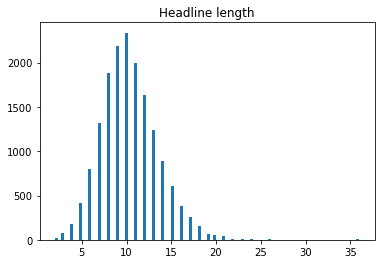

In [180]:
def plot_headline_len(dataf, col, title):
    dataf['len_' + col] = dataf[col].apply(lambda txt: len(txt.split()))
    plt.hist(dataf['len_' + col], bins = 100)
    plt.title('Headline length')
    plt.show()
    return dataf

col = 'Headline'
df = plot_headline_len(df, col, 'headline lengths')

In [181]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [182]:
def tokenize_txts(txts, max_len = 40):
    res = tokenizer(
        text = [tokenizer.tokenize(txt) for txt in txts],
        max_length = max_len,
        padding = 'max_length',
        truncation = True,
        is_split_into_words = True,
    )
    return {
        'input_word_ids': res['input_ids'],
        'input_mask': res['attention_mask'],
        'input_type_ids': res['token_type_ids'],
    }

def detokenize_txt(token):
    res = tokenizer.decode(token)
    return res

In [183]:
MAX_LEN = 40
BATCH_SIZE = 32

In [185]:
train_txts, test_txts, y_train, y_test = train_test_split(
    df[col].values, df['Example_Binary_Class'].values,
    shuffle = True, test_size = 0.15,
    stratify = df['Example_Binary_Class'].values,
)

print('Train size:', train_txts.shape)
print('Test size:', test_txts.shape)

Train size: (14096,)
Test size: (2488,)


In [186]:
train_tokens = tokenize_txts(train_txts, MAX_LEN)
test_tokens = tokenize_txts(test_txts, MAX_LEN)

In [187]:
print('Orginal txt: ', df["Headline"][10])
print()
sample = e_tokens['input_word_ids'][10]
print('Tokenized txt:', sample)
print()
print('Detokenized txt:', detokenize_txt(sample))

Orginal txt:  100 Days of Big, Bold, Partisan Change

Tokenized txt: [101, 2531, 2420, 1997, 2502, 1010, 7782, 1010, 14254, 2689, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Detokenized txt: [CLS] 100 days of big, bold, partisan change [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [188]:
train_ds = tf.data.Dataset.from_tensor_slices((train_tokens, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((test_tokens, y_test))

train_ds = train_ds.batch(BATCH_SIZE)
test_ds = test_ds.batch(BATCH_SIZE)

In [189]:
class MyF1(tf.keras.metrics.Metric):
    def __init__(self, name = 'mf1_score'):
        super(MyF1, self).__init__(name)
        self.p = tf.metrics.Precision()
        self.r = tf.metrics.Recall()
        self.f1 = self.add_weight(name="f1", initializer="zeros")
    
    def update_state(self, actual, predicted, sample_weight = None):
        self.p.update_state(actual, predicted)
        self.r.update_state(actual, predicted)
        self.f1.assign(2 * self.p.result() * self.r.result() / (self.p.result() + self.r.result()))
        
    def reset_states(self, ):
        self.p.reset_states()
        self.r.reset_states()
        self.f1.assign(0.0)
    def result(self,):
        return self.f1  

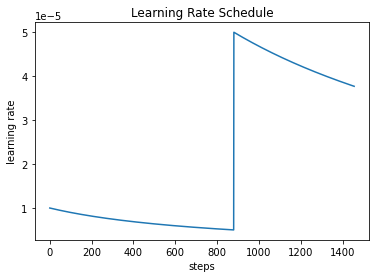

In [190]:
class CSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, lr, freeze_epoch ,batch_size, data_size):
        super(CSchedule, self).__init__()
        self.lr = lr
        self.bs = batch_size
        self.ds = data_size
        self.freeze_epoch = freeze_epoch

    def __call__(self, step):
        epoch = step /(self.ds / self.bs) + 1
        if not self.freeze_epoch or epoch < self.freeze_epoch:
            return self.lr / (tf.cast(epoch, tf.float32)+1)
        else:
            return self.lr * 10 / (tf.cast(epoch, tf.float32)+1)
        
clr = CSchedule(2e-5, 3, BATCH_SIZE, len(train_txts))
plt.plot([clr(x) for x in tf.range(1, 1457, dtype=tf.float32)])
plt.xlabel('steps')
plt.ylabel('learning rate')
plt.title('Learning Rate Schedule')
plt.show()

In [191]:
bert_handler = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'

In [192]:
class MClassifier(tf.keras.Model):
    def __init__(self, dropout_rate):
        super(MClassifier, self).__init__()
        
        self.bert_layer = hub.KerasLayer(
            bert_handler,
            name = 'feature_ext',
            trainable = True,
        )
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.proba = tf.keras.layers.Dense(1, activation = 'sigmoid')

    def call(self, X_in, training):
        x = self.bert_layer(X_in, training = training)
        x = x['pooled_output']
        x = self.dropout(x, training = training)
        output = self.proba(x)
        return output

In [193]:
LEARNING_RATE = 2e-5
EPOCHS = 5
DP_RATE = 0.3

loss_objective = tf.keras.losses.BinaryCrossentropy()

In [194]:
def model_evaluation(model, ds, name):
    acc = tf.keras.metrics.BinaryAccuracy()
    f1 = MyF1()
    total_loss = []
    y_hats = []
    for X, y in ds:
        y_hat = model(X, training = False)
        loss = loss_objective(y, y_hat)
        acc.update_state(y, y_hat)
        f1.update_state(y, y_hat)
        total_loss.append(loss.numpy())
        y_hats.append(y_hat)
    y_hats = tf.concat(y_hats, axis = 0).numpy()
    print(f'{name}, loss {np.mean(total_loss):.3f}, acc {acc.result().numpy():.3f}, f1 {f1.result().numpy():.3f}')
    return y_hats, acc.result().numpy(), f1.result().numpy()

In [195]:
@tf.function
def train_step(model, tr_vars, X, y):
    with tf.GradientTape() as tape:
        y_hat = model(X, training = True)
        loss = loss_objective(y, y_hat)
    grads = tape.gradient(loss, tr_vars)
    return loss, grads, y_hat

def train_model(model, epochs, freeze_bert_on_epoch = None):
    clr = CSchedule(LEARNING_RATE, freeze_bert_on_epoch, BATCH_SIZE, len(train_txts))
    optimizer = tf.keras.optimizers.Adam(clr)
    acc = tf.keras.metrics.BinaryAccuracy()
    f1 = MyF1()
    for epoch in range(1, epochs + 1):
        
        if freeze_bert_on_epoch is not None and epoch == freeze_bert_on_epoch:
            model.get_layer('feature_ext').trainable = False
            
        acc.reset_states()
        f1.reset_states()
        total_loss = []
        for X, y in train_ds:
            tr_vars = model.trainable_variables
            loss, grads, y_hat = train_step(model, tr_vars, X, y)
            optimizer.apply_gradients(zip(grads, tr_vars))
            acc.update_state(y, y_hat)
            f1.update_state(y, y_hat)
            total_loss.append(loss.numpy())
            
        print(f'epoch {epoch}, loss {np.mean(total_loss):.3f}, acc {acc.result().numpy():.3f}, f1 {f1.result().numpy():.3f}')
        
        
    y_test_hat, _, _ = model_evaluation(model, test_ds, 'test')
    return y_test_hat

In [196]:
model = MClassifier(DP_RATE,)
y_test_hat = train_model(model, EPOCHS, freeze_bert_on_epoch = 3)

epoch 1, loss 0.585, acc 0.724, f1 0.087
epoch 2, loss 0.556, acc 0.733, f1 0.165
epoch 3, loss 0.511, acc 0.755, f1 0.304
epoch 4, loss 0.508, acc 0.758, f1 0.363
epoch 5, loss 0.507, acc 0.760, f1 0.375


test, loss 0.561, acc 0.731, f1 0.272


In [144]:
y_model_hat = np.array([1 if x[0] >0.5 else 0 for x in y_test_hat])
print(classification_report(y_test, y_model_hat))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78      1663
           1       0.52      0.29      0.37       825

    accuracy                           0.68      2488
   macro avg       0.62      0.58      0.58      2488
weighted avg       0.65      0.68      0.65      2488



In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec.fit(df["Headline"])

tf_idf = pd.DataFrame(vec.transform(df["Headline"]).toarray(), columns = sorted(vec.vocabulary_.keys()))

In [151]:
tf_idf.head()

,00,000,01,07,08,10,100,100g,100k,100m,...,zimbabwe,zimmerman,zinke,zombie,zone,zones,zoning,zte,zuckerberg,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
tf_idf.names

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16579    0.0
16580    0.0
16581    0.0
16582    0.0
16583    0.0
Name: names, Length: 16584, dtype: float64

In [171]:
max_list = pd.DataFrame(tf_idf.max())

In [176]:
max_list_narrow = max_list[max_list[0] > .71]

In [178]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(max_list_narrow)

                      0
88             0.759235
ads            0.757852
again          0.800170
anxious        0.763187
awful          0.748819
bans           0.730977
blast          0.770047
blinking       0.722625
bounce         0.713224
brexit         0.857615
bye            0.955282
calculator     0.878133
canard         0.846334
cancel         0.875117
cantor         0.752401
celebrating    0.711945
chaos          0.777430
clueless       0.775813
con            0.719282
conservatives  0.784481
constitutes    0.735506
crossroads     0.788054
debates        0.721093
defund         0.809780
departure      0.749416
diet           0.733944
disarray       0.806537
disgrace       0.713805
ducks          0.894350
elections      0.769466
enough         0.767786
evolve         0.798957
fact           0.742112
fascists       0.797862
finally        0.712454
fix            0.870594
grit           0.871461
hashtag        0.733028
immigrant      0.717017
inaugural      0.782331
indefensible   0

In [146]:
pip install sklearn.feature_extraction.text

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.feature_extraction.text (from versions: none)
ERROR: No matching distribution found for sklearn.feature_extraction.text


In [147]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def count_chars(text):
    return len(text)

def count_words(text):
    return len(text.split())

def count_words_in_quotes(text):
    x = re.findall("'.'|"."", text)
    count = 0
    if x is None:
        return 0
    else:
        for i in x:
            t = i[1:-1]
            count += count_words(t)
        return count

def count_unique_words(text):
    return len(set(text.split()))

def count_stopwords:
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

